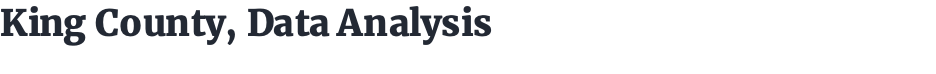



Please fill out:
* Student name: Natalia Edelson
* Student pace: self paced / part time / full time: Flex Program 
* Scheduled project review date/time: 
* Instructor name: Morgan Jones
* Blog post URL: https://medium.com/@nataliagoncharov/data-analysis-real-estate-in-king-county-washington-6c74cadc2e79



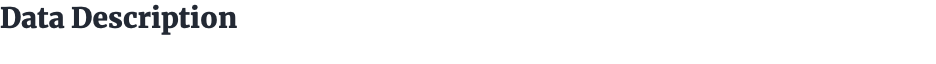 

* `id` - Unique identifier for a house
* `date` - Date house was sold
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
* `waterfront` - Whether the house is on a waterfront
  * Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts
* `view` - Quality of view from house
  * Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other
* `condition` - How good the overall condition of the house is. Related to maintenance of house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each condition code
* `grade` - Overall grade of the house. Related to the construction and design of the house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each building grade code
* `sqft_above` - Square footage of house apart from basement
* `sqft_basement` - Square footage of the basement
* `yr_built` - Year when house was built
* `yr_renovated` - Year when house was renovated
* `zipcode` - ZIP Code used by the United States Postal Service
* `lat` - Latitude coordinate
* `long` - Longitude coordinate
* `sqft_living15` - The square footage of interior housing living space for the nearest 15 neighbors
* `sqft_lot15` - The square footage of the land lots of the nearest 15 neighbors

 ### Project’s Purpose 

    The purpose of this project is to advise Edegon and Company, a real estate investment firm in King County, Washington. The following Data and Analysis will help the firm predict the market value of a given house, while the conclusions offer recommendations for future investments.


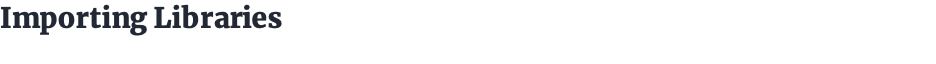

In [1]:
# Importing the neccessary libraries 
import pandas as pd 
# Import the neccessary libraries 
import pandas as pd 
import statsmodels as sm

from   statsmodels.api import formula 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn import datasets, linear_model
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,
mean_squared_error,r2_score
import warnings
warnings.filterwarnings("ignore")

import seaborn_image as isns
isns.set_context(fontfamily="times") # Setting up global font type
# Uploading the data 
kc_data = pd.read_csv("kc_house_data.csv", parse_dates = ['date'])

# Looking that the data has been uploaded properly and have a first glance ...
kc_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


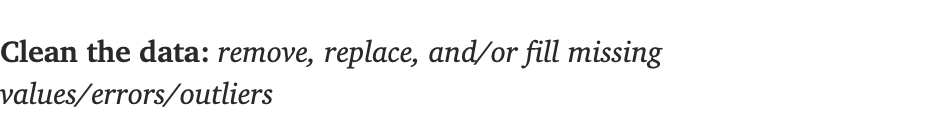

In [2]:
# Converting price unites to $ millions so that the data appears cleaner in graphs later on. 

kc_data['price'] = kc_data['price']/1000000

In [3]:
# Checking the size of the data.

kc_data.shape

(21597, 21)

In [4]:
kc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     19221 non-null  object        
 9   view           21534 non-null  object        
 10  condition      21597 non-null  object        
 11  grade          21597 non-null  object        
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  object        
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   1775

In [5]:
# Checking the columns that exist in the data.

columns = list(kc_data.columns)
print(columns)

['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


In [6]:
#kc_data = kc_data.drop(not_needed_columns,axis=1)

In [7]:
kc_data.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

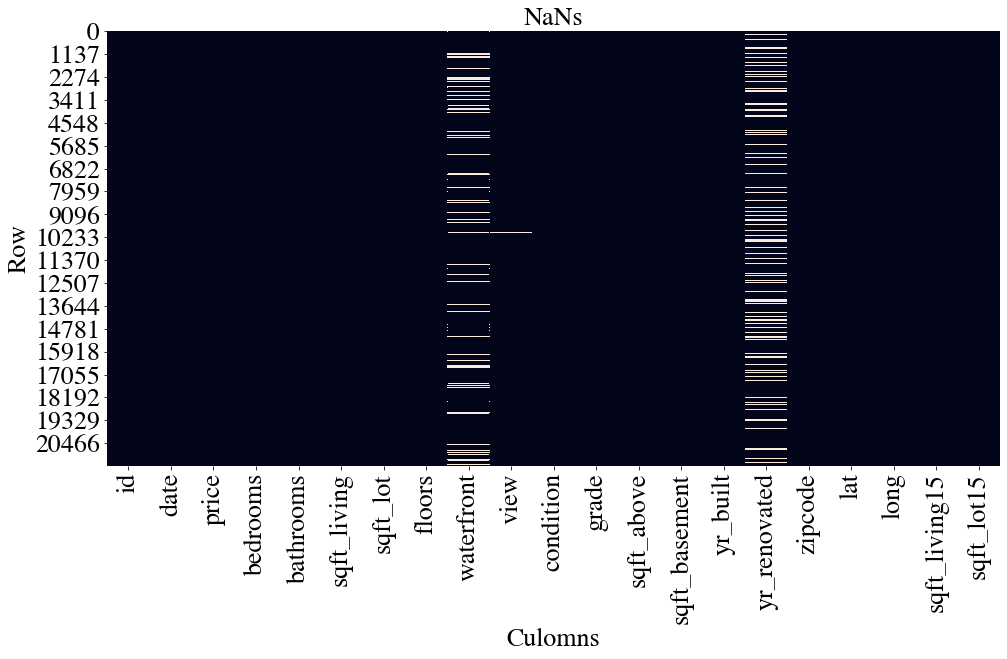

In [8]:
'''Visualizing the null values using heatmap. This allows me to see 
the big picture of the data more clearly.'''

fig, ax = plt.subplots(figsize=(16,8))

plt.tick_params(labelsize=22)

sns.heatmap(kc_data.isnull(), cbar=False)


plt.title("NaNs",fontsize=26)
plt.xlabel('Culomns',fontsize=26)
plt.ylabel('Row',fontsize=26)
plt.tick_params(axis='both', which='major', labelsize=26)

plt.show()

#### Checking the percentage of null values to determined whether I can delete raws of the respective NaN values and not loose a significant amount of data.

In [9]:
percent_null = kc_data.isnull().sum() * 100 / len(kc_data)

missing_value_kc_data = pd.DataFrame({'column_name': kc_data.columns,
                                 'percent_missing': percent_null})

percent_null

id                0.000000
date              0.000000
price             0.000000
bedrooms          0.000000
bathrooms         0.000000
sqft_living       0.000000
sqft_lot          0.000000
floors            0.000000
waterfront       11.001528
view              0.291707
condition         0.000000
grade             0.000000
sqft_above        0.000000
sqft_basement     0.000000
yr_built          0.000000
yr_renovated     17.789508
zipcode           0.000000
lat               0.000000
long              0.000000
sqft_living15     0.000000
sqft_lot15        0.000000
dtype: float64

#### View column has a small number of null values, therefore we can remove the rows in which the view column appears as NaN. 

In [10]:
# Let's drop all the rows in which there is NaNs in the view column. 
kc_data = kc_data.dropna(subset=['view'])

#### Year renovated and waterfront show a larger number of null values. I will replace the null with zero for the years renovated and then I will change it to the integer type of data. 

In [11]:
kc_data['yr_renovated'] = kc_data['yr_renovated'].fillna(0)

In [12]:
kc_data['yr_renovated'] = kc_data['yr_renovated'].astype(int)

In [13]:
kc_data['yr_renovated'].value_counts()

0       20791
2014       73
2003       31
2013       31
2007       30
        ...  
1946        1
1951        1
1948        1
1953        1
1976        1
Name: yr_renovated, Length: 70, dtype: int64

#### Examining waterfront, the percentage of the missing data is 11% and we will be left with 19,164 eateries. Therefore, I decided to clean it by removing the respective rows. There is a ‘?’ in the data. 

In [15]:
kc_data.dropna(subset=['waterfront'], inplace=True)

In [16]:
# We will run the is sum of null code again to see what's left.  
kc_data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [17]:
kc_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19164 entries, 1 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             19164 non-null  int64         
 1   date           19164 non-null  datetime64[ns]
 2   price          19164 non-null  float64       
 3   bedrooms       19164 non-null  int64         
 4   bathrooms      19164 non-null  float64       
 5   sqft_living    19164 non-null  int64         
 6   sqft_lot       19164 non-null  int64         
 7   floors         19164 non-null  float64       
 8   waterfront     19164 non-null  object        
 9   view           19164 non-null  object        
 10  condition      19164 non-null  object        
 11  grade          19164 non-null  object        
 12  sqft_above     19164 non-null  int64         
 13  sqft_basement  19164 non-null  object        
 14  yr_built       19164 non-null  int64         
 15  yr_renovated   1916

#### The data type for sqft_basement is shown to be ‘object’ and is supposed to be an integer or float. Scanning the sqft basement values to understand what values appear as objects. 

In [18]:
# sqft_basement  21534 non-null  object should be a number 
kc_data['sqft_basement'].unique()

array(['400.0', '0.0', '910.0', '1530.0', '?', '730.0', '300.0', '970.0',
       '760.0', '720.0', '700.0', '820.0', '780.0', '790.0', '330.0',
       '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0', '600.0',
       '550.0', '1000.0', '1600.0', '1700.0', '500.0', '1040.0', '880.0',
       '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0', '560.0',
       '840.0', '770.0', '570.0', '1490.0', '620.0', '1250.0', '1270.0',
       '120.0', '650.0', '180.0', '1130.0', '450.0', '1640.0', '1460.0',
       '1020.0', '1030.0', '750.0', '640.0', '1070.0', '490.0', '1310.0',
       '630.0', '2000.0', '390.0', '430.0', '210.0', '1950.0', '440.0',
       '220.0', '1160.0', '860.0', '580.0', '2060.0', '1820.0', '1180.0',
       '380.0', '200.0', '1150.0', '1200.0', '680.0', '1450.0', '1170.0',
       '1080.0', '960.0', '280.0', '870.0', '1100.0', '1400.0', '530.0',
       '660.0', '1220.0', '900.0', '420.0', '1580.0', '1380.0', '475.0',
       '690.0', '270.0', '350.0', '935.0', '710.0', '

#### I will replace it and 0 with a NaN and then drop the respective rows to remove it from the data. 

In [19]:
kc_data.sqft_basement.replace('?' and '0', np.nan ,inplace = True)

In [20]:
kc_data.sqft_basement.replace('0.0', np.nan, inplace = True)

In [21]:
kc_data.sqft_basement.replace('?', np.nan, inplace = True)

In [22]:
# Dropping NaNs from sqft_basement 
kc_data.dropna(subset=['sqft_basement'],inplace =True)

In [23]:
kc_data['sqft_basement'].unique()

array(['400.0', '910.0', '1530.0', '730.0', '300.0', '970.0', '760.0',
       '720.0', '700.0', '820.0', '780.0', '790.0', '330.0', '1620.0',
       '360.0', '588.0', '1510.0', '410.0', '990.0', '600.0', '550.0',
       '1000.0', '1600.0', '1700.0', '500.0', '1040.0', '880.0', '1010.0',
       '240.0', '265.0', '290.0', '800.0', '540.0', '560.0', '840.0',
       '770.0', '570.0', '1490.0', '620.0', '1250.0', '1270.0', '120.0',
       '650.0', '180.0', '1130.0', '450.0', '1640.0', '1460.0', '1020.0',
       '1030.0', '750.0', '640.0', '1070.0', '490.0', '1310.0', '630.0',
       '2000.0', '390.0', '430.0', '210.0', '1950.0', '440.0', '220.0',
       '1160.0', '860.0', '580.0', '2060.0', '1820.0', '1180.0', '380.0',
       '200.0', '1150.0', '1200.0', '680.0', '1450.0', '1170.0', '1080.0',
       '960.0', '280.0', '870.0', '1100.0', '1400.0', '530.0', '660.0',
       '1220.0', '900.0', '420.0', '1580.0', '1380.0', '475.0', '690.0',
       '270.0', '350.0', '935.0', '710.0', '1370.0', '98

In [24]:
kc_data['sqft_basement'] = kc_data['sqft_basement'].str.split('.',n=1, expand = True)

In [25]:
kc_data['sqft_basement'] = kc_data['sqft_basement'].astype(int)

In [26]:
kc_data['grade']= kc_data['grade'].astype(str)

In [27]:
kc_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7370 entries, 1 to 21591
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             7370 non-null   int64         
 1   date           7370 non-null   datetime64[ns]
 2   price          7370 non-null   float64       
 3   bedrooms       7370 non-null   int64         
 4   bathrooms      7370 non-null   float64       
 5   sqft_living    7370 non-null   int64         
 6   sqft_lot       7370 non-null   int64         
 7   floors         7370 non-null   float64       
 8   waterfront     7370 non-null   object        
 9   view           7370 non-null   object        
 10  condition      7370 non-null   object        
 11  grade          7370 non-null   object        
 12  sqft_above     7370 non-null   int64         
 13  sqft_basement  7370 non-null   int64         
 14  yr_built       7370 non-null   int64         
 15  yr_renovated   7370 

In [28]:
kc_data.dropna(subset=['sqft_basement'], inplace = True)

In [29]:
# Double checking that the '?' was removed.

kc_data.sqft_basement.unique()

array([ 400,  910, 1530,  730,  300,  970,  760,  720,  700,  820,  780,
        790,  330, 1620,  360,  588, 1510,  410,  990,  600,  550, 1000,
       1600, 1700,  500, 1040,  880, 1010,  240,  265,  290,  800,  540,
        560,  840,  770,  570, 1490,  620, 1250, 1270,  120,  650,  180,
       1130,  450, 1640, 1460, 1020, 1030,  750,  640, 1070,  490, 1310,
        630, 2000,  390,  430,  210, 1950,  440,  220, 1160,  860,  580,
       2060, 1820, 1180,  380,  200, 1150, 1200,  680, 1450, 1170, 1080,
        960,  280,  870, 1100, 1400,  530,  660, 1220,  900,  420, 1580,
       1380,  475,  690,  270,  350,  935,  710, 1370,  980,  850, 1470,
        160,  950,  460,   50, 1900,  340,  470,  370,  140,  480, 1760,
        130,  520,  890, 1110,  150, 1720,  810,  190, 1290,  670, 1800,
       1120,   60, 1050,  940,  310,  930, 1390,  610, 1830, 1300,  510,
       1590,  920, 1320, 1420, 1240, 1960, 1560, 2020, 1190, 2110, 1280,
        250, 1230,  170, 1780,  830, 1330, 1410,  5

In [30]:
'''Creating two new columns, 'month' and 'year' by extracting them from the date column. 
This will help me detect any seasonality trends.'''

def extract_date(df,column):
    kc_data[column+"year"] = kc_data[column].apply(lambda x: x.year)
    kc_data[column+"_month"] = kc_data[column].apply(lambda x: x.month)

In [31]:
extract_date(kc_data,'date')

In [32]:
kc_data['year'] = pd.DatetimeIndex(kc_data['date']).year

In [33]:
kc_data['month'] = pd.DatetimeIndex(kc_data['date']).month

In [34]:
# Using describe method to check for outliers.

kc_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,dateyear,date_month,year,month
count,7.370000e+03,7370.000000,7370.000000,7370.000000,7370.000000,7370.000000,7370.000000,7370.000000,7370.000000,7370.000000,7370.000000,7370.000000,7370.000000,7370.000000,7370.000000,7370.000000,7370.000000,7370.000000,7370.000000,7370.000000
mean,4.608717e+09,0.623672,3.558480,2.272693,2313.011805,13188.630665,1.324830,1573.544912,739.466893,1965.094301,86.246269,98088.559973,47.583131,-122.255627,2021.529308,11394.298643,2014.317639,6.605834,2014.317639,6.605834
std,2.870696e+09,0.449737,1.014971,0.777863,959.555858,30776.711805,0.479015,726.383103,406.956997,28.407044,406.184637,55.644301,0.122733,0.119262,660.343167,23917.322717,0.465590,3.101004,0.465590,3.101004
min,2.800031e+06,0.100000,1.000000,0.500000,680.000000,572.000000,1.000000,480.000000,10.000000,1900.000000,0.000000,98001.000000,47.177500,-122.514000,460.000000,651.000000,2014.000000,1.000000,2014.000000,1.000000
25%,2.145425e+09,0.375000,3.000000,1.750000,1680.000000,5000.000000,1.000000,1117.000000,440.000000,1947.000000,0.000000,98034.000000,47.521125,-122.351000,1560.000000,5000.000000,2014.000000,4.000000,2014.000000,4.000000
50%,3.971701e+09,0.513000,3.000000,2.250000,2100.000000,7520.000000,1.000000,1370.000000,700.000000,1967.000000,0.000000,98105.000000,47.596250,-122.288000,1880.000000,7560.000000,2014.000000,6.000000,2014.000000,6.000000
75%,7.338402e+09,0.711000,4.000000,2.750000,2700.000000,10660.750000,2.000000,1780.000000,970.000000,1984.000000,0.000000,98124.250000,47.678900,-122.180000,2320.000000,10017.000000,2015.000000,9.000000,2015.000000,9.000000
max,9.900000e+09,7.700000,33.000000,8.000000,13540.000000,871200.000000,3.500000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.321000,6110.000000,871200.000000,2015.000000,12.000000,2015.000000,12.000000


#### Continuing Scrubbing
* There are some categorical variables such as: waterfront, view, condition, grade, yr_built and zip code. I will handle these later on.
* The maximum square feet is 13,450 and the minimum is 680 which suggests widely distributed data.
* In the bedroom column the maximum number is 33 and this seems to be an outlier or perhaps even a place holder, so I will remove that data point below.
 


In [35]:
# I will remove 33 in the bedrooms column given that it is an outlier 
# and I will use the idxmax() method. 

kc_data['bedrooms'] = kc_data['bedrooms'].drop(kc_data['bedrooms'].idxmax())
kc_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,dateyear,date_month,year,month
count,7.370000e+03,7370.000000,7369.000000,7370.000000,7370.000000,7370.000000,7370.000000,7370.000000,7370.000000,7370.000000,7370.000000,7370.000000,7370.000000,7370.000000,7370.000000,7370.000000,7370.000000,7370.000000,7370.000000,7370.000000
mean,4.608717e+09,0.623672,3.554485,2.272693,2313.011805,13188.630665,1.324830,1573.544912,739.466893,1965.094301,86.246269,98088.559973,47.583131,-122.255627,2021.529308,11394.298643,2014.317639,6.605834,2014.317639,6.605834
std,2.870696e+09,0.449737,0.955325,0.777863,959.555858,30776.711805,0.479015,726.383103,406.956997,28.407044,406.184637,55.644301,0.122733,0.119262,660.343167,23917.322717,0.465590,3.101004,0.465590,3.101004
min,2.800031e+06,0.100000,1.000000,0.500000,680.000000,572.000000,1.000000,480.000000,10.000000,1900.000000,0.000000,98001.000000,47.177500,-122.514000,460.000000,651.000000,2014.000000,1.000000,2014.000000,1.000000
25%,2.145425e+09,0.375000,3.000000,1.750000,1680.000000,5000.000000,1.000000,1117.000000,440.000000,1947.000000,0.000000,98034.000000,47.521125,-122.351000,1560.000000,5000.000000,2014.000000,4.000000,2014.000000,4.000000
50%,3.971701e+09,0.513000,3.000000,2.250000,2100.000000,7520.000000,1.000000,1370.000000,700.000000,1967.000000,0.000000,98105.000000,47.596250,-122.288000,1880.000000,7560.000000,2014.000000,6.000000,2014.000000,6.000000
75%,7.338402e+09,0.711000,4.000000,2.750000,2700.000000,10660.750000,2.000000,1780.000000,970.000000,1984.000000,0.000000,98124.250000,47.678900,-122.180000,2320.000000,10017.000000,2015.000000,9.000000,2015.000000,9.000000
max,9.900000e+09,7.700000,11.000000,8.000000,13540.000000,871200.000000,3.500000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.321000,6110.000000,871200.000000,2015.000000,12.000000,2015.000000,12.000000


In [36]:
# Confirming that there are no missing values. 

missing_value_kc_data 

,column_name,percent_missing
id,id,0.000000
date,date,0.000000
price,price,0.000000
bedrooms,bedrooms,0.000000
bathrooms,bathrooms,0.000000
sqft_living,sqft_living,0.000000
sqft_lot,sqft_lot,0.000000
floors,floors,0.000000
waterfront,waterfront,11.001528
view,view,0.291707


#### The data in both condition and view columns contain numbers and words in them. I will convert the data type to integer by replacing it with numbers, keeping the range of ranking.


In [37]:
kc_data['grade'].unique()

array(['7 Average', '11 Excellent', '9 Better', '8 Good', '5 Fair',
       '6 Low Average', '10 Very Good', '12 Luxury', '13 Mansion',
       '4 Low'], dtype=object)

In [38]:
kc_data['grade'] = kc_data['grade'].str.extract(r'(\d+)', expand = True) 
kc_data['grade'].unique()

array(['7', '11', '9', '8', '5', '6', '10', '12', '13', '4'], dtype=object)

In [39]:
kc_data['grade'] = kc_data['grade'].astype(int)

In [40]:
# Setting up encoding by assigning an integer value for each unique category 
dic_cond = {'Poor' : 1, 'Fair' : 2, 'Average': 3, 'Good' : 4, 'Very Good': 5}
dic_view = {'NONE':1,'FAIR':2, 'AVERAGE':3,'GOOD':4 , 'EXCELLENT':5}
#dic_waterfront ={'NO':0, 'YES':1}
kc_data['condition'] = kc_data['condition'].map(dic_cond)
kc_data['view'] = kc_data['view'].map(dic_view)
#kc_data['waterfront'] = kc_data['waterfront'].map(dic_waterfront)
kc_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,dateyear,date_month,year,month
1,6414100192,2014-12-09,0.5380,3.0,2.25,2570,7242,2.0,NO,1,...,1991,98125,47.7210,-122.319,1690,7639,2014,12,2014,12
3,2487200875,2014-12-09,0.6040,4.0,3.00,1960,5000,1.0,NO,1,...,0,98136,47.5208,-122.393,1360,5000,2014,12,2014,12
5,7237550310,2014-05-12,1.2300,4.0,4.50,5420,101930,1.0,NO,1,...,0,98053,47.6561,-122.005,4760,101930,2014,5,2014,5
8,2414600126,2015-04-15,0.2295,3.0,1.00,1780,7470,1.0,NO,1,...,0,98146,47.5123,-122.337,1780,8113,2015,4,2015,4
11,9212900260,2014-05-27,0.4680,2.0,1.00,1160,6000,1.0,NO,1,...,0,98115,47.6900,-122.292,1330,6000,2014,5,2014,5


In [41]:
kc_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7370 entries, 1 to 21591
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             7370 non-null   int64         
 1   date           7370 non-null   datetime64[ns]
 2   price          7370 non-null   float64       
 3   bedrooms       7369 non-null   float64       
 4   bathrooms      7370 non-null   float64       
 5   sqft_living    7370 non-null   int64         
 6   sqft_lot       7370 non-null   int64         
 7   floors         7370 non-null   float64       
 8   waterfront     7370 non-null   object        
 9   view           7370 non-null   int64         
 10  condition      7370 non-null   int64         
 11  grade          7370 non-null   int64         
 12  sqft_above     7370 non-null   int64         
 13  sqft_basement  7370 non-null   int64         
 14  yr_built       7370 non-null   int64         
 15  yr_renovated   7370 

In [42]:
kc_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,dateyear,date_month,year,month
1,6414100192,2014-12-09,0.5380,3.0,2.25,2570,7242,2.0,NO,1,...,1991,98125,47.7210,-122.319,1690,7639,2014,12,2014,12
3,2487200875,2014-12-09,0.6040,4.0,3.00,1960,5000,1.0,NO,1,...,0,98136,47.5208,-122.393,1360,5000,2014,12,2014,12
5,7237550310,2014-05-12,1.2300,4.0,4.50,5420,101930,1.0,NO,1,...,0,98053,47.6561,-122.005,4760,101930,2014,5,2014,5
8,2414600126,2015-04-15,0.2295,3.0,1.00,1780,7470,1.0,NO,1,...,0,98146,47.5123,-122.337,1780,8113,2015,4,2015,4
11,9212900260,2014-05-27,0.4680,2.0,1.00,1160,6000,1.0,NO,1,...,0,98115,47.6900,-122.292,1330,6000,2014,5,2014,5


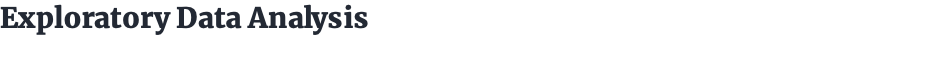

In our data, I encountered 45 houses that were resold in 2014 and 2015. The majority of these were resold for a higher price. The grade or condition of the houses did not change, but the resale took place in a different time of the year. 

In [43]:
kc_data_dublicate = kc_data[kc_data.duplicated(subset=['id'],keep= False)]
kc_data_dublicate.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,dateyear,date_month,year,month
93,6021501535,2014-07-25,0.43,3.0,1.50,1580,5000,1.0,NO,1,...,0,98117,47.6870,-122.386,1570,4500,2014,7,2014,7
94,6021501535,2014-12-23,0.70,3.0,1.50,1580,5000,1.0,NO,1,...,0,98117,47.6870,-122.386,1570,4500,2014,12,2014,12
313,4139480200,2014-06-18,1.38,4.0,3.25,4290,12103,1.0,NO,4,...,0,98006,47.5503,-122.102,3860,11244,2014,6,2014,6
314,4139480200,2014-12-09,1.40,4.0,3.25,4290,12103,1.0,NO,4,...,0,98006,47.5503,-122.102,3860,11244,2014,12,2014,12
1084,9834200885,2014-07-17,0.36,4.0,2.50,2080,4080,1.0,NO,1,...,0,98144,47.5720,-122.290,1340,4080,2014,7,2014,7


In [44]:
kc_data_dublicate = kc_data_dublicate[['id', 'date_month', 'price','grade',
                                       'condition']]
kc_data_dublicate

,id,date_month,price,grade,condition
93,6021501535,7,0.430000,8,3
94,6021501535,12,0.700000,8,3
313,4139480200,6,1.380000,11,3
314,4139480200,12,1.400000,11,3
1084,9834200885,7,0.360000,7,5
...,...,...,...,...,...
18689,3558900590,3,0.692500,7,3
18976,7856400300,7,1.410000,10,5
18977,7856400300,3,1.510000,10,5
19536,643300040,11,0.481000,7,4


In [45]:
'''Creating a new data frame in which I only include the duplicate data. 
Consolidating it using  group by ‘id’ where one raw represents one house 
that was sold and then re-sold at a later point.'''

kc_group_id = kc_data_dublicate.set_index(['id', kc_data_dublicate.groupby('id')
.cumcount()])[['price','date_month','grade','condition']].unstack().add_prefix('price').reset_index()

In [46]:
kc_group_id.head()

id priceprice           pricedate_month        pricegrade         \
                  price0    price1          price0 price1     price0 price1   
0   526059224      0.260  0.470000               9      2          7      7   
1   641900050      0.335  0.499950               8      2          7      7   
2   643300040      0.481  0.719521              11      3          7      7   
3  1139600270      0.300  0.310000               7      3          8      8   
4  1217000340      0.185  0.340000               6      2          7      7   

  pricecondition         
          price0 price1  
0              3      3  
1              3      3  
2              4      4  
3              3      3  
4              4      4

In [47]:
kc_group_id.columns

MultiIndex([(             'id',       ''),
            (     'priceprice', 'price0'),
            (     'priceprice', 'price1'),
            ('pricedate_month', 'price0'),
            ('pricedate_month', 'price1'),
            (     'pricegrade', 'price0'),
            (     'pricegrade', 'price1'),
            ( 'pricecondition', 'price0'),
            ( 'pricecondition', 'price1')],
           )

In [48]:
# It turns into ta multi-inex dataframe - I will remove the layer 
# by using droplevel()
kc_group_id.columns = kc_group_id.columns.droplevel(level=0)

In [49]:
# Generating a list of numerizing the houses.
myList = list(range(1, 46))

In [50]:
kc_group_id['home_no.'] = myList 
kc_group_id.head()

,,price0,price1,price0,price1,price0,price1,price0,price1,home_no.
0,526059224,0.260,0.470000,9,2,7,7,3,3,1
1,641900050,0.335,0.499950,8,2,7,7,3,3,2
2,643300040,0.481,0.719521,11,3,7,7,4,4,3
3,1139600270,0.300,0.310000,7,3,8,8,3,3,4
4,1217000340,0.185,0.340000,6,2,7,7,4,4,5


In [51]:
# Changing column names to clarify.

kc_group_id.columns.values[0] = 'id'
kc_group_id.columns.values[1] = 'price_1'
kc_group_id.columns.values[2] = 'price_2'
kc_group_id.columns.values[3] = 'month_1'
kc_group_id.columns.values[4] = 'month_2'
kc_group_id.columns.values[5] = 'grade_1'
kc_group_id.columns.values[6] = 'grade_2'
kc_group_id.columns.values[5] = 'cond_1'
kc_group_id.columns.values[6] = 'cond_2'

In [52]:
# Creating a new data frame where hume_no. is the index. 
buy_sell = pd.DataFrame(kc_group_id['home_no.'].index)

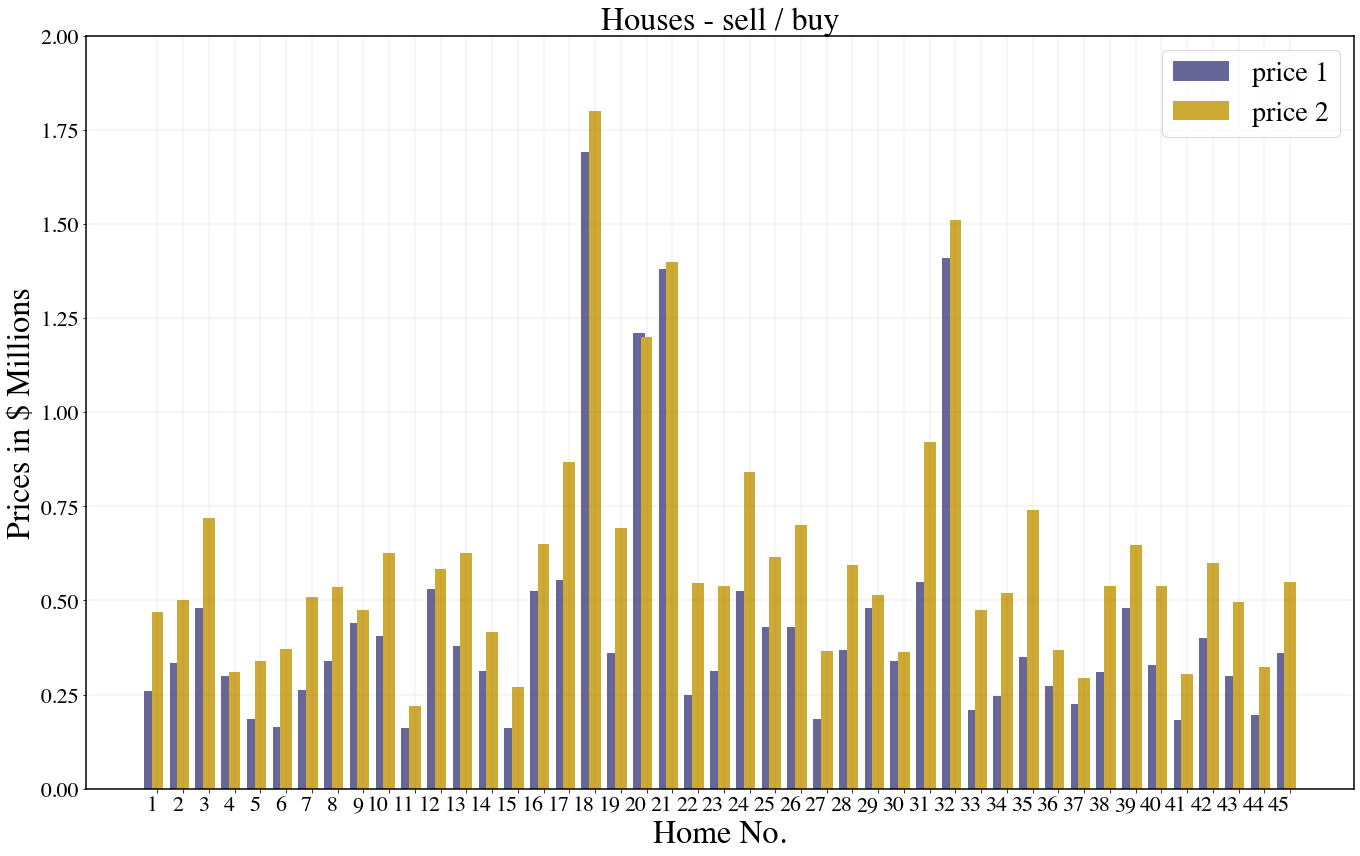

In [53]:
marks = buy_sell # setting x-ticks

x = np.arange(len(marks))  # the label locations

# set the plot, format, and labels


fig, ax = plt.subplots(figsize=(19,12))
bar_width = 0.3
ax1 = ax.bar(x - bar_width / 2,
             kc_group_id['price_1'].values,
             width = 0.45,
             color = '#666699',
             label='price 1')
ax2 = ax.bar(x + bar_width / 2,
             kc_group_id['price_2'].values,
             width = 0.45,
             color = '#CCAA33',
             label='price 2')
#ax.yaxis.set_major_formatter(currency) #CCAA33
plt.ylim(0,2.)

plt.tick_params(labelsize=22)

ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(kc_group_id['home_no.'].unique())


plt.setp(ax.get_xticklabels(), rotation=0, ha='right') 
# cite: https://pythonguides.com/matplotlib-x-axis-label/


ax.grid(color='#AF3150', linestyle='-', linewidth=0.1)
ax.set_xlabel('Home No.',fontsize = 32)
ax.set_ylabel('Prices in $ Millions', fontsize = 32)
# Add title and legends 

ax.set_title('Houses - sell / buy', fontsize = 32)
ax.legend(loc="upper right", frameon=True, fontsize=28)
# format the layout and display the visualization
fig.tight_layout()
plt.show()

In [54]:
# Creating a column that captures the difference of the price 
# differences(gross profit).

kc_group_id['price_diff'] = kc_group_id['price_2'] - kc_group_id['price_1']

In [55]:
kc_group_id.head()

,id,price_1,price_2,month_1,month_2,cond_1,cond_2,price0,price1,home_no.,price_diff
0,526059224,0.260,0.470000,9,2,7,7,3,3,1,0.210000
1,641900050,0.335,0.499950,8,2,7,7,3,3,2,0.164950
2,643300040,0.481,0.719521,11,3,7,7,4,4,3,0.238521
3,1139600270,0.300,0.310000,7,3,8,8,3,3,4,0.010000
4,1217000340,0.185,0.340000,6,2,7,7,4,4,5,0.155000


In [56]:
group_month = kc_group_id.groupby(['price_diff']).mean()
group_month = pd.DataFrame.reset_index(group_month)

group_month.head()

,price_diff,id,price_1,price_2,month_1,month_2,cond_1,cond_2,price0,price1,home_no.
0,-0.0100,4139420590,1.210,1.2000,5,8,12,12,3,3,20
1,0.0100,1139600270,0.300,0.3100,7,3,8,8,3,3,4
2,0.0200,4139480200,1.380,1.4000,6,12,11,11,3,3,21
3,0.0230,7387500235,0.340,0.3630,5,3,7,7,3,3,30
4,0.0335,1250201165,0.441,0.4745,11,3,6,6,3,3,9


In [57]:
# Creating a function that has bars with range of colores - darker from 
# tightest and lighter to the lowset.
def colors_from_values(values: pd.Series, palette_name:str, ascending=True):
    values = values.sort_values(ascending=ascending).reset_index()
    indices = values.sort_values(by=values.columns[0]).index
    palette = sns.color_palette(palette_name, len(values))
    return np.array(palette).take(indices, axis=0)

s = group_month ["price_diff"]
#s2 = total_group_month ["price"]

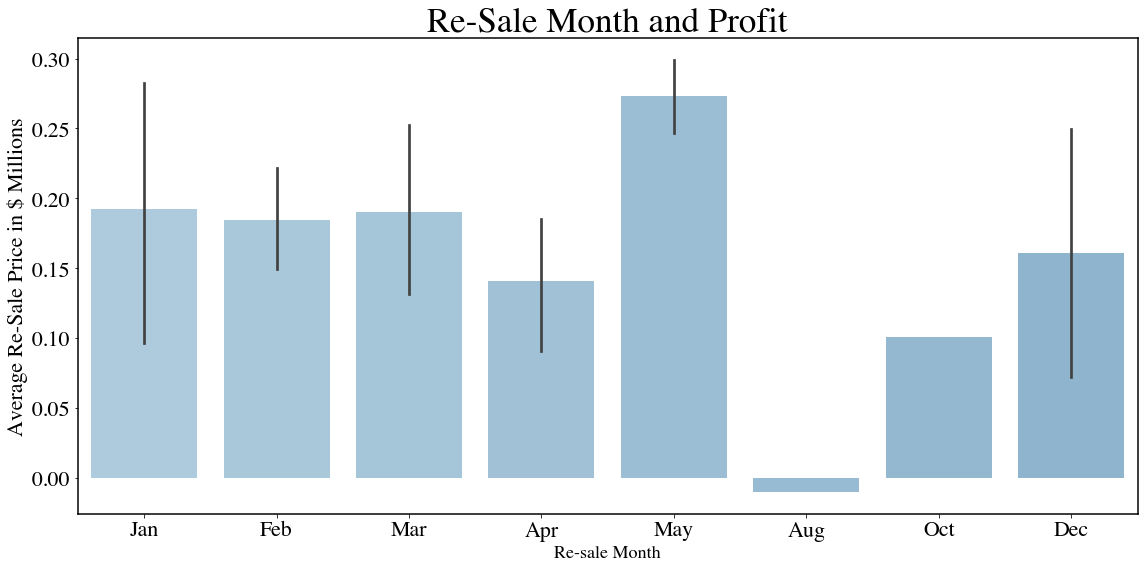

In [59]:
# Plot bar displaying the months of the release day and 
#making the darkest color to be the highest.

fig, ax = plt.subplots(figsize=(16, 8))

# Create plot here with sns.

sns.barplot(x="month_2", y="price_diff", data=group_month, 
            palette=colors_from_values(s, "Blues_d"))

# Lable and define fontsize for main and axis titles.

plt.xlabel('Re-sale Month', fontsize=18)
plt.ylabel('Average Re-Sale Price in $ Millions', fontsize=22)
plt.title('Re-Sale Month and Profit', fontsize=35)
plt.tick_params(axis='both', which='major', labelsize=22)

# Set x-axis tick labels.

ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May','Aug','Oct','Dec'])


plt.tight_layout()
plt.show()

The resale price was highest during the month of May, followed by January and March. In the summer, there were no resales, and those that did take place (August) lost money. This suggests that the timing of the sale makes a difference. 

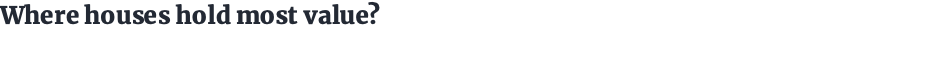

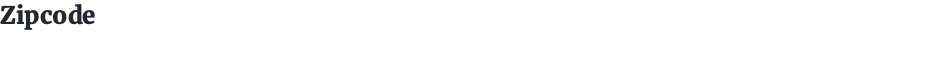

Grouping the zip codes by price and checking their mean so I can see if there is a pattern of prices. 

In [60]:
''' will group the zipcodes by price and check their mean 
so that I could see if there is any pattern of the prices ''' 
group_zipcode = kc_data.groupby(['zipcode'])['price'].mean()

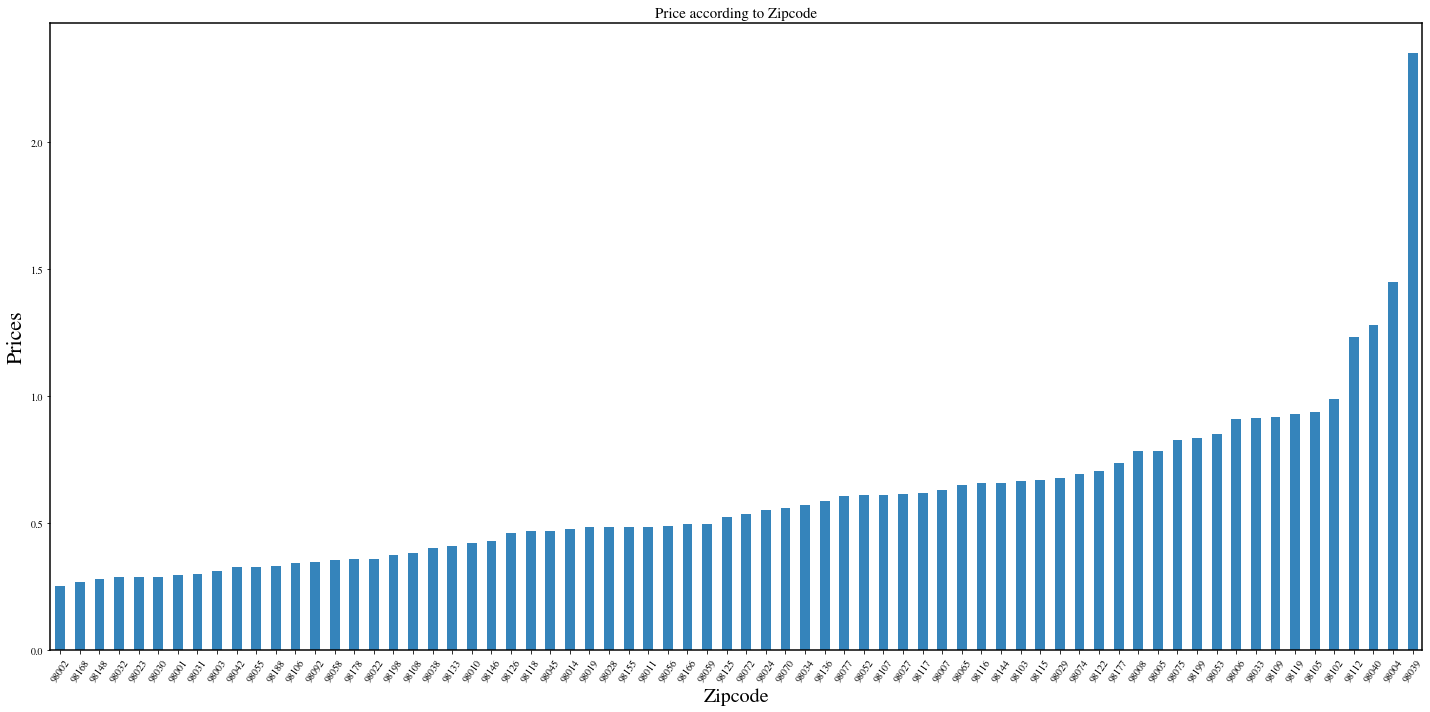

<Figure size 432x288 with 0 Axes>

In [61]:
# Let's view the data with a sorted value

plt.figure(figsize=(20, 18))
isns.set_context(fontfamily="times")
group_zipcode = group_zipcode.sort_values()
group_zipcode.plot(kind='bar',x='zipcode',y='price',align='center', 
                   alpha=0.9,figsize=(20,10))
# the plot gets saved to 'output.png'

plt.title('Price according to Zipcode' )
plt.xticks(rotation = 55)
plt.xlabel('Zipcode',fontsize=20)
plt.ylabel('Prices',fontsize=22)
plt.tight_layout()

plt.show()
plt.savefig('output.png')

In [62]:
top20p = kc_data.sort_values(by= 'zipcode', ascending = False).head(368)
top20p.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,dateyear,date_month,year,month
3153,6821100195,2015-03-31,0.830,4.0,3.00,2020,6000,1.0,NO,1,...,2015,98199,47.6563,-122.401,1400,6000,2015,3,2015,3
8678,6822100750,2015-05-08,0.700,3.0,1.75,1500,6000,1.0,NO,1,...,0,98199,47.6474,-122.402,1700,6000,2015,5,2015,5
19452,3271800870,2014-08-07,1.230,4.0,2.25,2020,5800,1.0,NO,4,...,0,98199,47.6471,-122.412,3100,5800,2014,8,2014,8
3110,5035300750,2014-07-31,0.850,3.0,1.75,2450,8603,1.0,NO,1,...,0,98199,47.6536,-122.414,2280,5779,2014,7,2014,7
3119,3271800850,2014-08-06,0.765,3.0,1.75,2440,5800,1.0,NO,4,...,0,98199,47.6474,-122.412,2530,5800,2014,8,2014,8


In [63]:
top20p = kc_data.sort_values(by= 'price', ascending = False).head(1474)
top20p.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,dateyear,date_month,year,month
7245,6762700020,2014-10-13,7.70,6.0,8.00,12050,27600,2.5,NO,4,...,1987,98102,47.6298,-122.323,3940,8800,2014,10,2014,10
3910,9808700762,2014-06-11,7.06,5.0,4.50,10040,37325,2.0,YES,3,...,2001,98004,47.6500,-122.214,3930,25449,2014,6,2014,6
9245,9208900037,2014-09-19,6.89,6.0,7.75,9890,31374,2.0,NO,5,...,0,98039,47.6305,-122.240,4540,42730,2014,9,2014,9
4407,2470100110,2014-08-04,5.57,5.0,5.75,9200,35069,2.0,NO,1,...,0,98039,47.6289,-122.233,3560,24345,2014,8,2014,8
1446,8907500070,2015-04-13,5.35,5.0,5.00,8000,23985,2.0,NO,5,...,0,98004,47.6232,-122.220,4600,21750,2015,4,2015,4


#### Looking into any 20 % of the most expensive houses with their respective latitude, longitude. Houses seem to be scattered around with high prices being less frequent while the majority of the houses are below $2 million.

In [64]:
top20p_long_lat = top20p[['lat', 'long']]
top20p_long_lat

,lat,long
7245,47.6298,-122.323
3910,47.6500,-122.214
9245,47.6305,-122.240
4407,47.6289,-122.233
1446,47.6232,-122.220
...,...,...
13392,47.6853,-122.305
16371,47.6296,-122.205
3145,47.7027,-122.282
19693,47.6214,-122.062


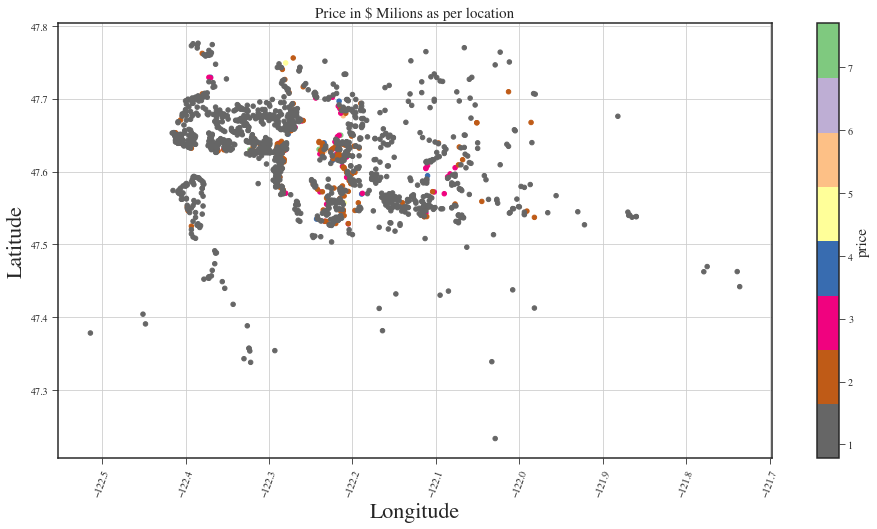

In [65]:
plt.style.use("seaborn-ticks")
isns.set_context(fontfamily="times")
top20p.plot(kind="scatter", x="long", y="lat", figsize=(16, 8), c="price", 
             cmap="Accent_r", colorbar=True, sharex=False)


plt.xticks(rotation = 70)
plt.grid(which='both')
plt.title('Price in $ Milions as per location')

plt.xlabel('Longitude', fontsize=22)
plt.ylabel('Latitude', fontsize=22)
plt.savefig('output.png')
plt.show()

In [66]:
# I will group the zipcodes and check their mean so that 
# I could see if there is any pattern of the prices 
group_zipcode = top20p.groupby(['zipcode'])['price'].mean()
group_zipcode.head()

zipcode
98001    0.850000
98003    0.810000
98004    1.606250
98005    0.939148
98006    1.216673
Name: price, dtype: float64

#### Extracting top and bottom 20 % of the most expensive houses with their respective latitude, longitude, and zip codes.

In [67]:
zipcode = top20p.groupby('zipcode', as_index = False)  
zipcode

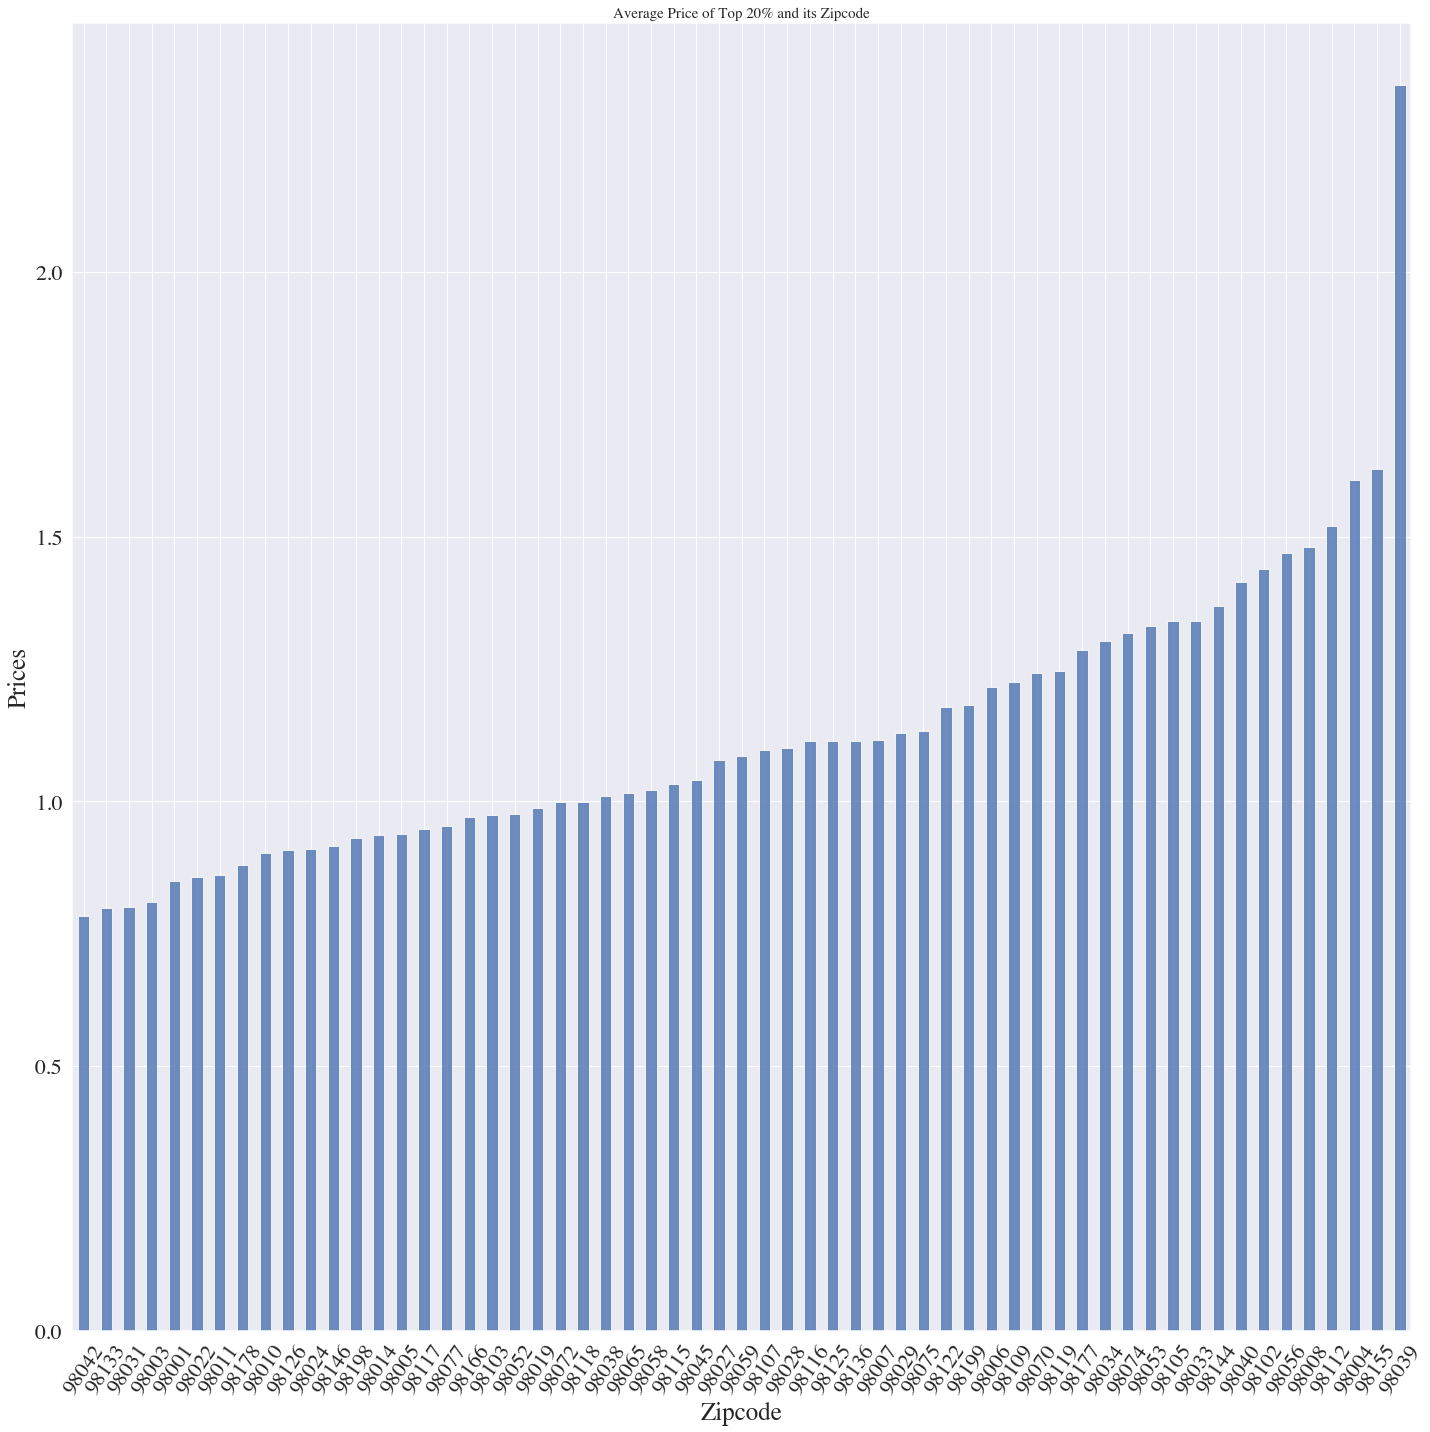

<Figure size 432x288 with 0 Axes>

In [68]:
# Let's view the data with a sorted value
plt.figure(figsize=(12, 8))
sns.set(font_scale=2)
isns.set_context(fontfamily="times")

group_zipcode = group_zipcode.sort_values()
group_zipcode.plot(kind='bar',x='zipcode',y='price',align='center', 
                   alpha=0.8,figsize=(20,20))
# the plot gets saved to 'output.png'

plt.title('Average Price of Top 20% and its Zipcode' )

plt.xticks(rotation = 55)
plt.xlabel('Zipcode', fontsize=25)
plt.ylabel('Prices', fontsize=25)
plt.tight_layout()

plt.show()
plt.savefig('output.png')

In [69]:
bottom20p = kc_data.sort_values(by= 'price', ascending = False).tail(368)
bottom20p

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,dateyear,date_month,year,month
9430,4302201085,2014-09-18,0.2480,3.0,1.00,1470,7680,1.0,NO,1,...,0,98106,47.5276,-122.359,1470,6784,2014,9,2014,9
1619,1310500550,2014-12-20,0.2480,4.0,2.25,2320,8760,1.0,NO,1,...,0,98032,47.3627,-122.285,1970,8690,2014,12,2014,12
8412,2172000846,2014-06-19,0.2480,4.0,2.00,2080,13510,1.0,NO,1,...,0,98178,47.4918,-122.258,2010,11625,2014,6,2014,6
4834,5151600480,2015-04-02,0.2480,3.0,1.75,1840,19501,1.0,NO,1,...,0,98003,47.3364,-122.318,1910,12000,2015,4,2015,4
4295,2122059160,2015-04-27,0.2480,5.0,1.75,2190,16788,1.0,NO,3,...,0,98030,47.3764,-122.176,1920,8366,2015,4,2015,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12729,5560000650,2014-12-02,0.1350,3.0,1.00,1520,8450,1.0,NO,1,...,0,98023,47.3280,-122.337,1320,8450,2014,12,2014,12
10376,3361402041,2014-10-30,0.1340,3.0,1.00,1270,8508,1.0,NO,1,...,0,98168,47.4961,-122.322,1200,9415,2014,10,2014,10
3686,6303401050,2015-02-20,0.1325,3.0,0.75,850,8573,1.0,NO,1,...,0,98146,47.5030,-122.356,850,8382,2015,2,2015,2
3481,3352402250,2014-10-21,0.1199,2.0,1.00,700,3180,1.0,NO,1,...,0,98178,47.4976,-122.262,1760,6360,2014,10,2014,10


In [70]:
group_zipcode_b = bottom20p.groupby(['zipcode'])['price'].mean()
group_zipcode_b.head()

zipcode
98001    0.213633
98002    0.218162
98003    0.223144
98006    0.247500
98010    0.200000
Name: price, dtype: float64

In [71]:
zipcode_b = bottom20p.groupby('zipcode', as_index = False)  
zipcode_b.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,dateyear,date_month,year,month
9430,4302201085,2014-09-18,0.24800,3.0,1.00,1470,7680,1.0,NO,1,...,0,98106,47.5276,-122.359,1470,6784,2014,9,2014,9
1619,1310500550,2014-12-20,0.24800,4.0,2.25,2320,8760,1.0,NO,1,...,0,98032,47.3627,-122.285,1970,8690,2014,12,2014,12
8412,2172000846,2014-06-19,0.24800,4.0,2.00,2080,13510,1.0,NO,1,...,0,98178,47.4918,-122.258,2010,11625,2014,6,2014,6
4834,5151600480,2015-04-02,0.24800,3.0,1.75,1840,19501,1.0,NO,1,...,0,98003,47.3364,-122.318,1910,12000,2015,4,2015,4
4295,2122059160,2015-04-27,0.24800,5.0,1.75,2190,16788,1.0,NO,3,...,0,98030,47.3764,-122.176,1920,8366,2015,4,2015,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2350,7229700105,2015-04-24,0.17250,2.0,2.00,1510,20685,1.0,NO,1,...,0,98059,47.4810,-122.116,1490,29527,2015,4,2015,4
19547,42000245,2014-06-13,0.17100,4.0,2.00,1520,19672,1.0,NO,1,...,0,98188,47.4683,-122.281,1810,7840,2014,6,2014,6
9865,1219000473,2014-06-26,0.16495,3.0,1.75,1570,15330,1.0,NO,1,...,0,98166,47.4608,-122.340,1250,13330,2014,6,2014,6
8716,7883603425,2014-05-29,0.15500,3.0,1.00,1250,6250,1.0,NO,1,...,0,98108,47.5292,-122.323,1130,6250,2014,5,2014,5


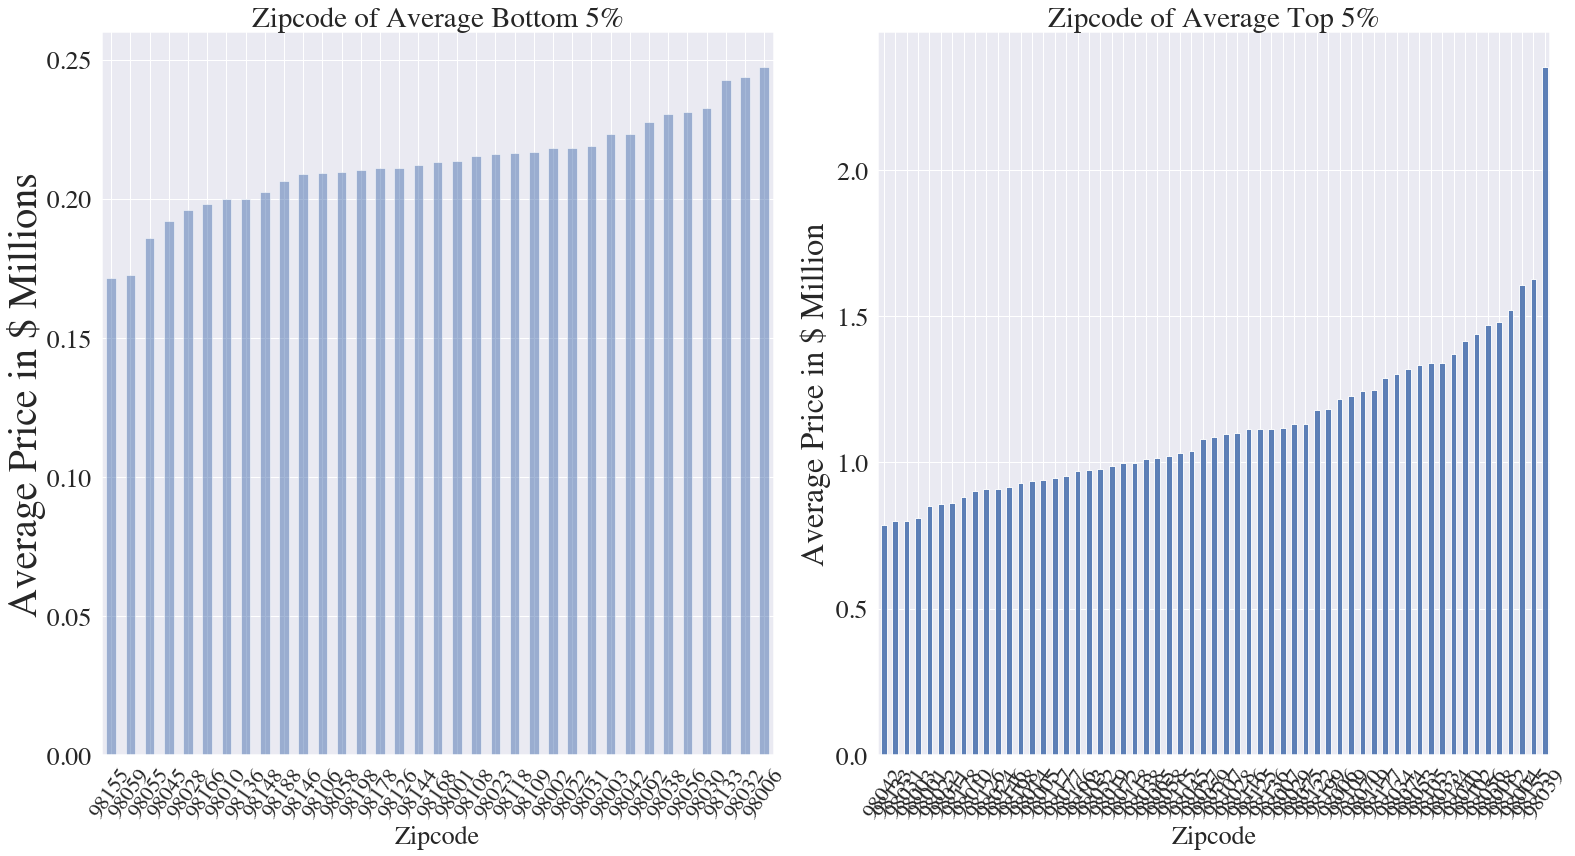

In [72]:

sns.set(font_scale=3)
plt.figure(2, figsize=(20,15))

#plt.figure(figsize=(18, 12))
isns.set_context(fontfamily="times")
plt.subplot(1,2,1) # two subplots 
#sns.histplot(data=waterfront_non, kde=True)
group_zipcode_b = group_zipcode_b.sort_values()
group_zipcode_b.plot(kind='bar',x='zipcode',y='price', 
                     alpha=0.5,figsize=(22,12))
# the plot gets saved to 'output.png'

#sns.set(font="Garamond")
#plt.axvline(np.median(waterfront_non),color='b', linestyle='--')

#m = np.mean(waterfront_non)
#m = round(m,2)

plt.title('Zipcode of Average Bottom 5%', fontsize=29)
plt.xticks(rotation =55, fontsize=22)
plt.yticks(rotation =0, fontsize=26)
plt.xlabel('Zipcode',fontsize=26)
plt.ylabel('Average Price in $ Millions',labelpad=0.3, fontsize=40)


plt.subplot(1,2,2)
group_zipcode = group_zipcode.sort_values()
group_zipcode.plot(kind='bar',x='zipcode',y='price', 
                   alpha=0.9,figsize=(22,12))

plt.title('Zipcode of Average Top 5%',fontsize=29);
plt.xticks(rotation =55, fontsize=22)
plt.yticks(rotation =0, fontsize=26)
plt.xlabel('Zipcode',fontsize=26)
plt.ylabel('Average Price in $ Million',labelpad=5,fontsize=32)

plt.tight_layout()

plt.show()


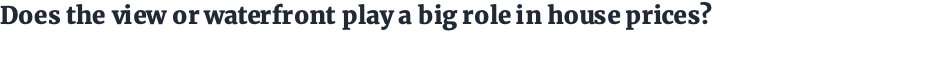

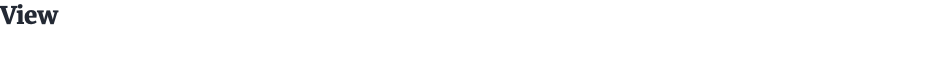

Looking into the price distribution in respect to the ranking of view using a box plot. 
 
The majority of houses are shown to have a low grade view. 
 
Only 7% of houses have what is considered a “good” or “excellent” view, and these range from $800K to $2 million in value. By comparison, 83% of houses do not have a view, and these range from $350K-$500K in value.


Text(0, 0.5, 'View')

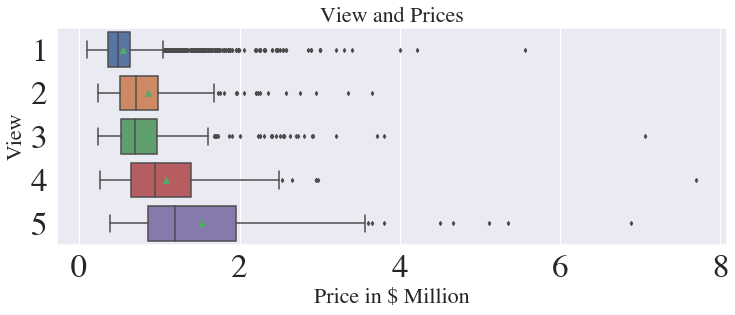

In [73]:
fig, ax = plt.subplots(figsize=(12,4))
isns.set_context(fontfamily="times")
sns.boxplot(y = kc_data['view'], x = kc_data['price'], 
            width = 0.8,orient = 'h', showmeans = True, 
            fliersize = 3, ax = ax)
plt.title('View and Prices', fontsize=22)
plt.xlabel('Price in $ Million',fontsize=22)
plt.ylabel('View',fontsize=22)

In [74]:
kc_data['view'].value_counts()

1    6147
3     501
4     305
2     212
5     205
Name: view, dtype: int64

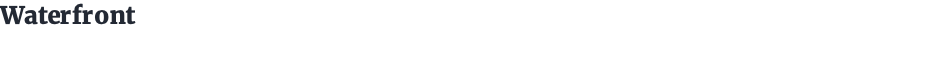

Examining the distribution of waterfront using a box plot.
 
Zeroing into the distribution of the houses with waterfront and houses without waterfront. 
 
In particular, waterfront homes are significantly more valuable than those without. Homes without a waterfront typically range from $300K-$600K, while waterfront homes typically cost more than three times that amount, from $900K-$2.6M.


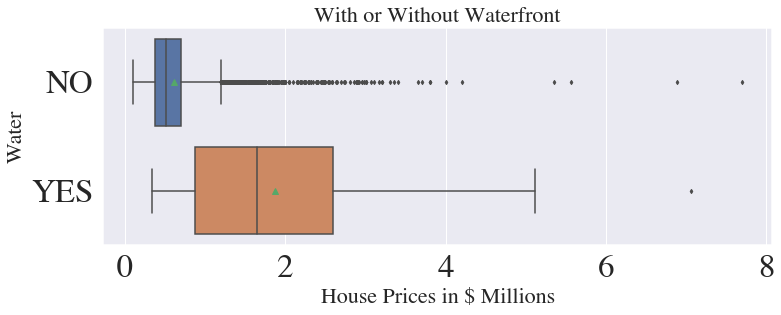

In [75]:
#We would need to visualize the data to clearly see where the data rests. Let's use boxplot to visualize waterfront:

from scipy import stats, linalg

fig, ax = plt.subplots(figsize=(12,4))

sns.boxplot(y = kc_data['waterfront'], x = kc_data['price'], 
            width = 0.8,orient = 'h', showmeans = True, 
            fliersize = 3, ax = ax)
plt.title('With or Without Waterfront', fontsize=22)
plt.xlabel('House Prices in $ Millions',fontsize=22)
plt.ylabel('Water',fontsize=22)


# ???
# Calculate the correlation coefficient
#r, p = stats.pointbiserialr(kc_data['waterfront'], kc_data['price'])
#print ('point biserial correlation r is %s with p = %s' %(r,p))

plt.show()

In [76]:
waterfront_non = kc_data.loc[kc_data['waterfront']=='NO','price']

In [77]:
waterfront_non.head() 

1     0.5380
3     0.6040
5     1.2300
8     0.2295
11    0.4680
Name: price, dtype: float64

In [78]:
waterfront = kc_data.loc[kc_data['waterfront']=='YES','price']
waterfront.head()

49     1.350
230    0.655
246    2.400
300    3.080
457    0.705
Name: price, dtype: float64

In [79]:
kc_water=kc_data['waterfront']=0

In [80]:
kc_data.shape

(7370, 25)

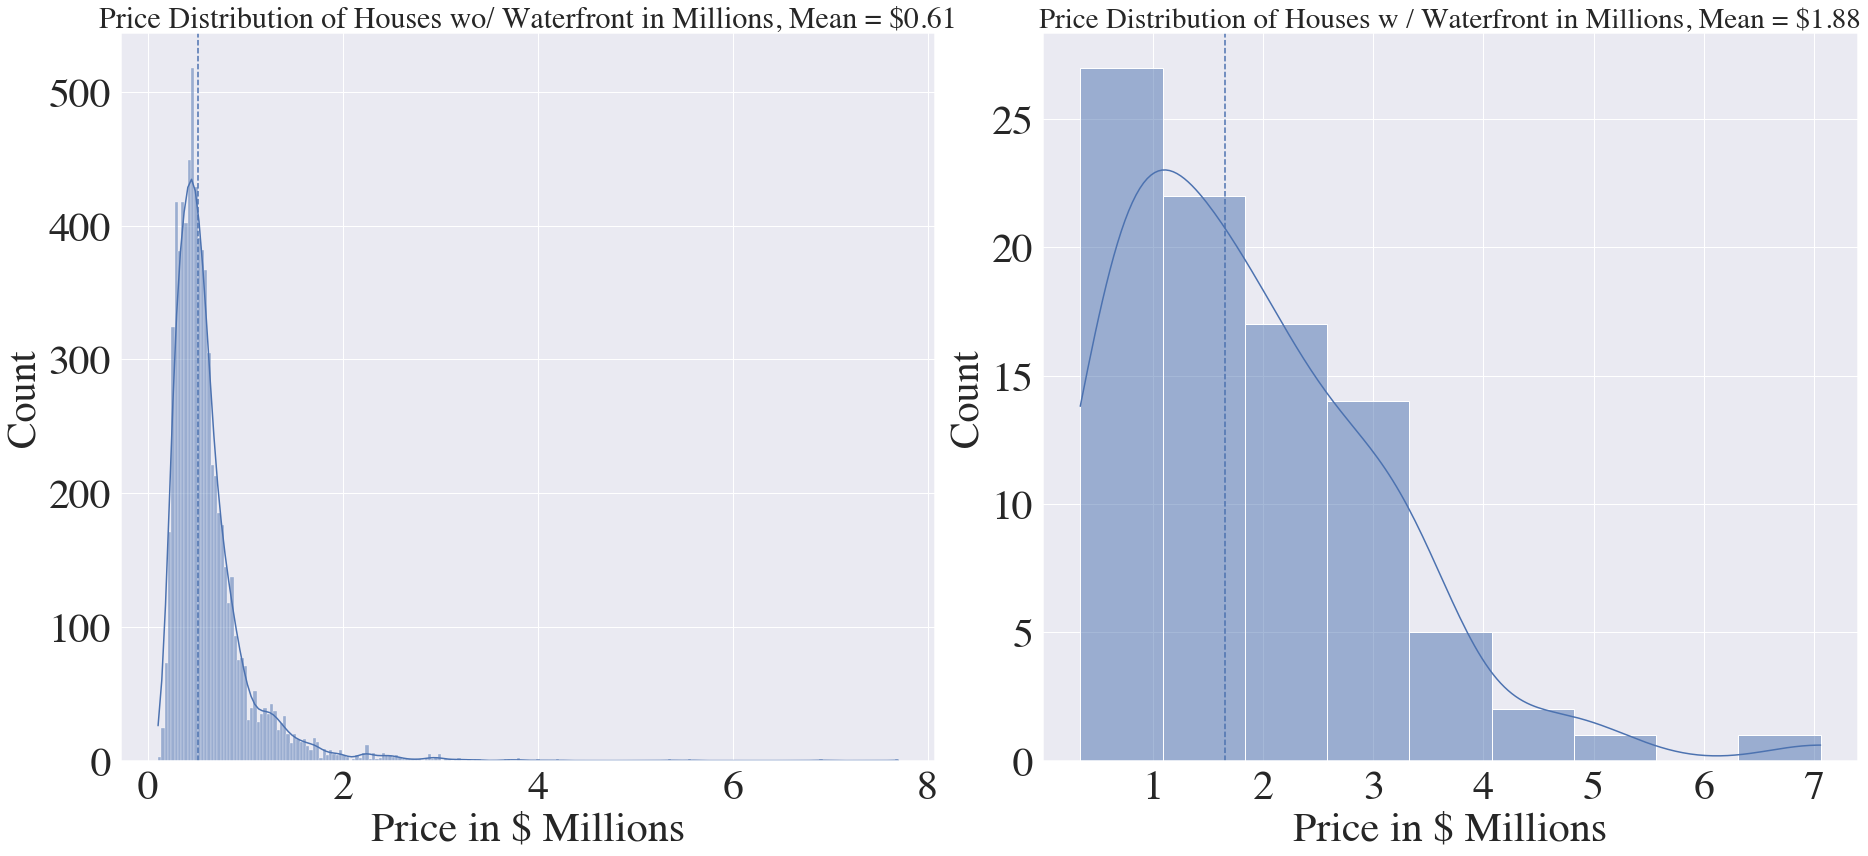

In [81]:

plt.figure(figsize=(26, 12))
sns.set(font_scale=3)
isns.set_context(fontfamily="times")
plt.subplot(1,2,1) # two subplots 
sns.histplot(data=waterfront_non, kde=True)

#sns.set(font="Garamond")
plt.axvline(np.median(waterfront_non),color='b', linestyle='--')

m = np.mean(waterfront_non)
m = round(m,2)

plt.title('Price Distribution of Houses wo/ Waterfront in Millions, 
          Mean = $' +str(m),fontsize=30);
plt.xticks(rotation =0, fontsize=42)
plt.yticks(rotation =0, fontsize=42)
plt.xlabel('Price in $ Millions',fontsize=42)
plt.ylabel('Count',fontsize=40)


plt.subplot(1,2,2)
sns.histplot(data=waterfront, kde=True)
plt.axvline(np.median(waterfront),color='b', linestyle='--')

m = np.mean(waterfront)
m = round(m,2)

plt.title('Price Distribution of Houses w / Waterfront in Millions, 
          Mean = $' +str(m),fontsize=29);
plt.xticks(rotation =0, fontsize=42)
plt.yticks(rotation =0, fontsize=42)
plt.xlabel('Price in $ Millions',fontsize=42)
plt.ylabel('Count',fontsize=40)

plt.tight_layout()

plt.show()




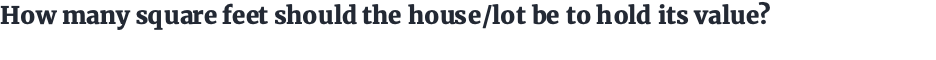

I plotted a scatter plot to show the strong correlation to price and soft living. I also included additional information about the year built to check if any pattern could be captured. But unexpectedly, the year a house was built did not show a relationship to price. 


Text(0, 0.5, 'Price in $ Millions')

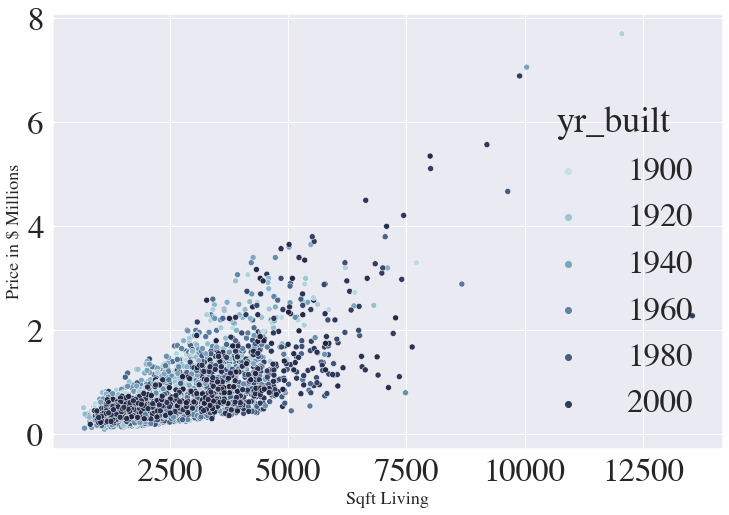

In [82]:
plt.subplots(figsize=(12,8))
isns.set_context(fontfamily="times")
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)  
ax = sns.scatterplot(x="sqft_living", y="price",  
                     hue="yr_built",  
                     palette=cmap, sizes=(500, 500),  
                     data=kc_data)  


fig.suptitle('Sqft of living and House prices ')
plt.xlabel('Sqft Living', fontsize=18)
plt.ylabel('Price in $ Millions', fontsize=18)

Text(0, 0.5, 'Price in $ Millions')

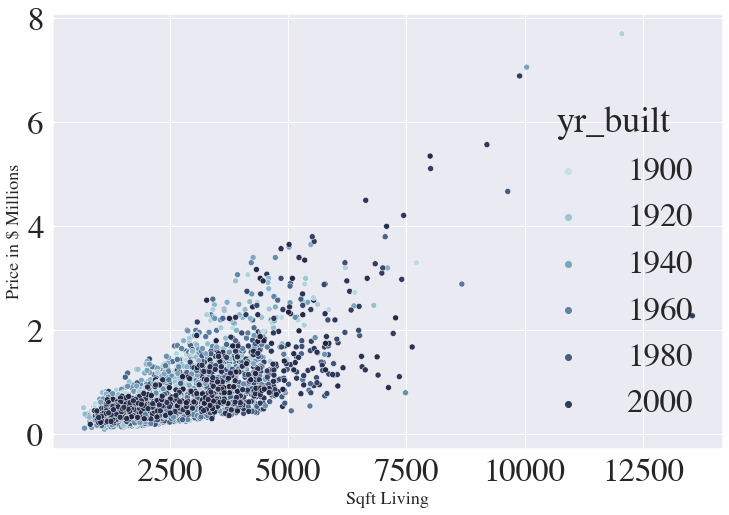

In [83]:
plt.subplots(figsize=(12,8))

isns.set_context(fontfamily="times")
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)  
ax = sns.scatterplot(x="sqft_living", y="price",  
                     hue="yr_built",  
                     palette=cmap, sizes=(500, 500),  
                     data=kc_data)  


fig.suptitle('Sqft of living and House prices ')
plt.xlabel('Sqft Living', fontsize=18)
plt.ylabel('Price in $ Millions', fontsize=18)

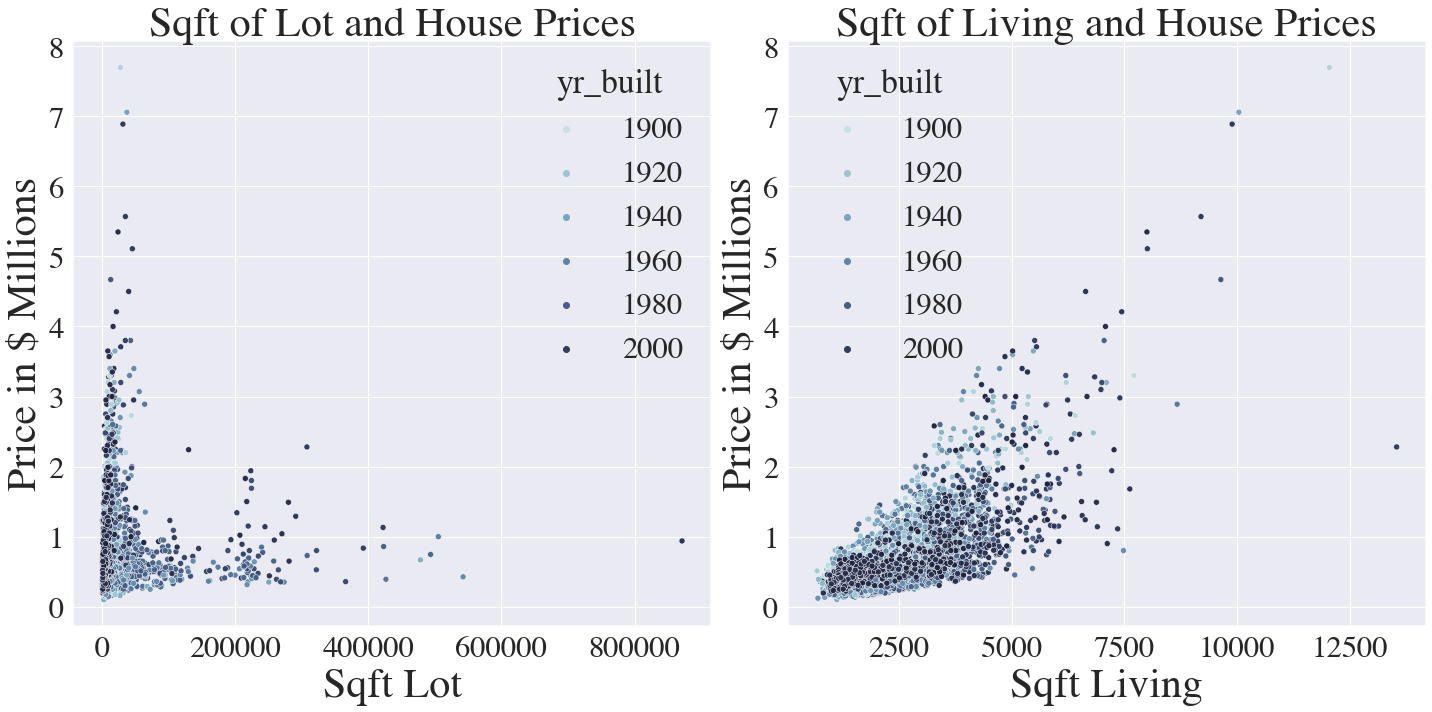

In [84]:
# Comparing the lot versus square living.
 

plt.figure(figsize=(20, 10))


sns.set(font_scale=2.8)

isns.set_context(fontfamily="times")
plt.subplot(1,2,1) # two subplots 



cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)  


ax = sns.scatterplot(x="sqft_lot", y="price",  
                     hue="yr_built",  
                     palette=cmap,  
                     data=kc_data)  


plt.title('Sqft of Lot and House Prices' , fontsize=42)
plt.xlabel('Sqft Lot', fontsize=42)
plt.ylabel('Price in $ Millions', fontsize=42)

plt.subplot(1,2,2)

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True) 


isns.set_context(fontfamily="times")
ax = sns.scatterplot(x="sqft_living", y="price", hue="yr_built",   
                     palette=cmap, 
                     data=kc_data)  


plt.title('Sqft of Living and House Prices',fontsize=42)
plt.xlabel('Sqft Living', fontsize=42)
plt.ylabel('Price in $ Millions', fontsize=42)

plt.tight_layout()

In [85]:
#Correlation table gives us a precise number which supports the heatmap.

corrTable = kc_data.corr()
corrTable=round(corrTable,2)
corrTable

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,dateyear,date_month,year,month
id,1.00,-0.02,0.01,0.00,-0.02,-0.13,0.02,NaN,0.01,-0.02,...,-0.00,-0.03,-0.03,-0.00,-0.01,-0.12,0.00,-0.00,0.00,-0.00
price,-0.02,1.00,0.26,0.53,0.72,0.07,0.35,NaN,0.45,0.08,...,0.15,-0.06,0.24,0.02,0.60,0.05,0.00,-0.00,0.00,-0.00
bedrooms,0.01,0.26,1.00,0.46,0.52,0.06,0.08,NaN,0.10,0.07,...,0.05,-0.15,0.00,0.13,0.33,0.04,-0.01,0.00,-0.01,0.00
bathrooms,0.00,0.53,0.46,1.00,0.70,0.13,0.47,NaN,0.24,-0.06,...,0.09,-0.18,0.03,0.19,0.51,0.11,-0.03,0.01,-0.03,0.01
sqft_living,-0.02,0.72,0.52,0.70,1.00,0.23,0.33,NaN,0.37,0.03,...,0.09,-0.20,0.03,0.23,0.72,0.21,-0.03,0.02,-0.03,0.02
sqft_lot,-0.13,0.07,0.06,0.13,0.23,1.00,-0.02,NaN,0.07,-0.01,...,0.00,-0.18,-0.11,0.33,0.20,0.79,0.01,-0.02,0.01,-0.02
floors,0.02,0.35,0.08,0.47,0.33,-0.02,1.00,NaN,0.12,-0.16,...,0.07,0.09,0.10,-0.05,0.18,-0.02,-0.03,0.03,-0.03,0.03
waterfront,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
view,0.01,0.45,0.10,0.24,0.37,0.07,0.12,NaN,1.00,0.03,...,0.09,0.06,-0.02,-0.04,0.41,0.06,-0.01,-0.00,-0.01,-0.00
condition,-0.02,0.08,0.07,-0.06,0.03,-0.01,-0.16,NaN,0.03,1.00,...,-0.10,-0.02,-0.01,-0.05,0.01,-0.01,-0.06,0.02,-0.06,0.02


#### It’s evident that, unlike living space, lot size does not show a  correlation to price.

### Other elements to cosider - How New should the house be?  under what condition? 


In [86]:
kc_data['condition'].unique()

array([3, 5, 4, 1, 2])

In [87]:
group_condition = kc_data.groupby(['condition']).mean()
group_condition = pd.DataFrame.reset_index(group_condition)
#group_condition['price'] = group_condition['price']/1000000
group_condition

,condition,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,dateyear,date_month,year,month
0,1,5.337300e+09,0.324333,3.333333,1.666667,1850.000000,19043.000000,1.000000,0.0,1.000000,...,0.000000,98066.000000,47.655767,-122.216333,1916.666667,9508.333333,2014.333333,4.333333,2014.333333,4.333333
1,2,5.097944e+09,0.417773,3.200000,1.800000,1861.400000,26088.940000,1.050000,0.0,1.140000,...,79.280000,98072.180000,47.506904,-122.221080,1751.000000,20294.940000,2014.400000,6.080000,2014.400000,6.080000
2,3,4.642844e+09,0.612184,3.514252,2.350058,2313.367290,12714.375000,1.415421,0.0,1.379439,...,124.420327,98091.615654,47.588666,-122.253732,2022.512383,11173.595561,2014.333879,6.600234,2014.333879,6.600234
3,4,4.575608e+09,0.603976,3.590193,2.118534,2281.827260,14584.501125,1.173639,0.0,1.428250,...,32.132254,98080.241565,47.568642,-122.251511,2020.325686,12193.019793,2014.314890,6.557805,2014.314890,6.557805
4,5,4.486960e+09,0.751617,3.691267,2.318182,2425.753071,11056.217445,1.279484,0.0,1.449631,...,34.056511,98096.299754,47.598004,-122.279098,2036.651106,9833.706388,2014.234644,6.807125,2014.234644,6.807125


In [88]:
price = kc_data['price']

Text(0, 0.5, 'Condition')

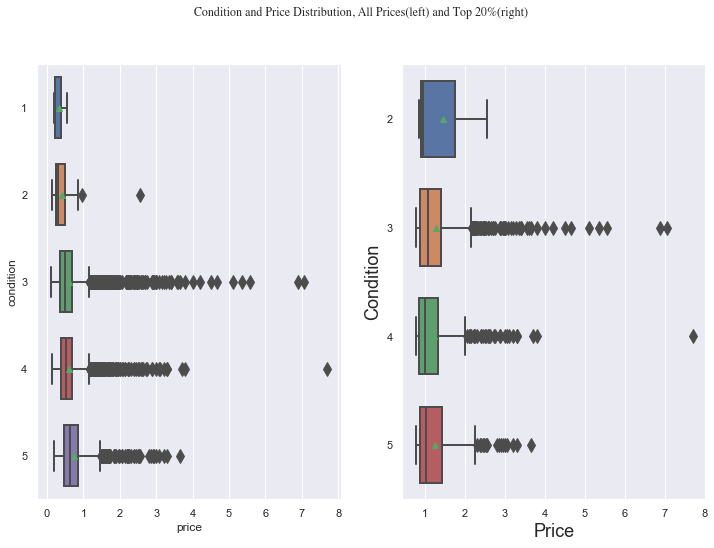

In [89]:
sns.set() # Setting seaborn as default style even if use only matplotlib

fig, axes = plt.subplots(1, 2, figsize=(12,8))

isns.set_context(fontfamily="times")

fig.suptitle('Condition and Price Distribution, 
             All Prices(left) and Top 20%(right)')

sns.boxplot(ax=axes[0], y = kc_data['condition'], 
            x =kc_data['price'],
            width = 0.7, orient ='h', showmeans = True, 
            linewidth = 2, fliersize =10)

plt.xlabel('Condition', fontsize=18)
plt.ylabel('Price in $ Milllions', fontsize=18)


isns.set_context(fontfamily="times")
sns.boxplot(ax=axes[1], y = top20p['condition'], x = top20p['price'],
            width = 0.7, orient ='h', 
            showmeans = True, linewidth = 2, fliersize =10)

plt.xlabel('Price', fontsize=18)
plt.ylabel('Condition', fontsize=18)


#sns.boxplot(y = kc_data['condition'], x = kc_data['price'], 
             ax = axes[0, 0])

In [90]:
## Condition and Grade 

Text(0.5, 0.98, 'Grade and Condition against prices')

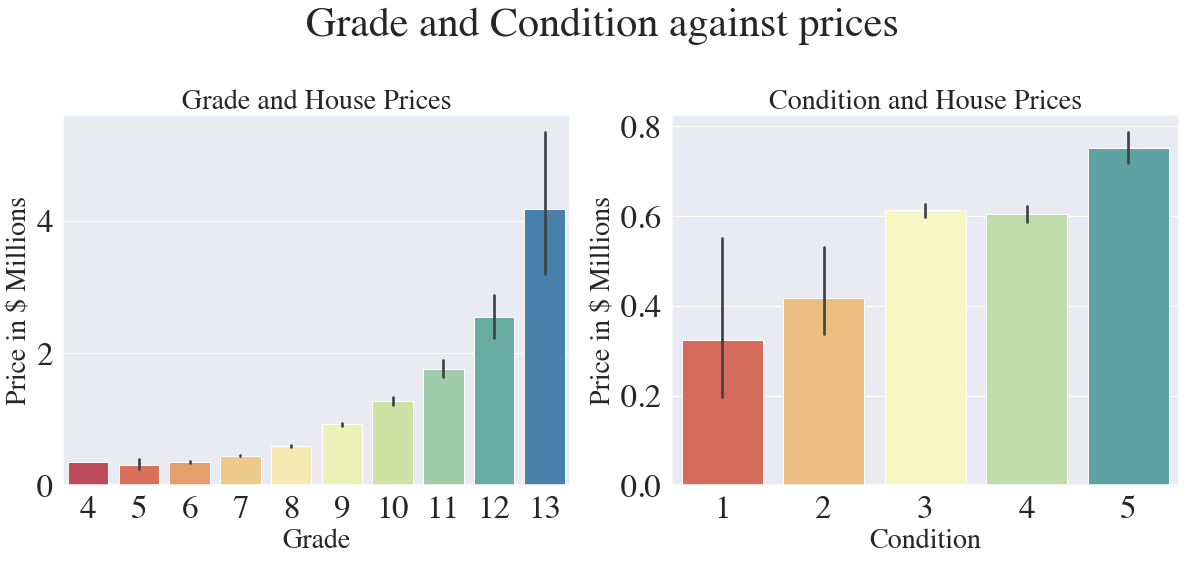

In [91]:
from matplotlib.gridspec import GridSpec


#sns.set_color_codes("Spectral")

sns.set(font_scale=3)
isns.set_context(fontfamily="times")
plt.figure(2, figsize=(20,15))
the_grid = GridSpec(2, 2)

plt.subplot(the_grid[0, 1],  title='Condition')

sns.barplot(x='condition', y='price', data=kc_data, 
            palette='Spectral')
plt.title('Condition and House Prices' , fontsize=28)
plt.xlabel('Condition', fontsize=28)
plt.ylabel('Price in $ Millions', fontsize=28)



plt.subplot(the_grid[0, 0], title='Grade')

sns.barplot(x='grade',y='price', data=kc_data, palette='Spectral')


plt.title('Grade and House Prices' , fontsize=28)
plt.xlabel('Grade', fontsize=28)
plt.ylabel('Price in $ Millions', fontsize=28)


plt.suptitle('Grade and Condition against prices', fontsize=42)


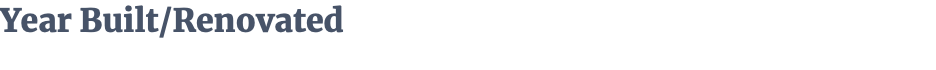

<AxesSubplot:xlabel='yr_built', ylabel='price'>

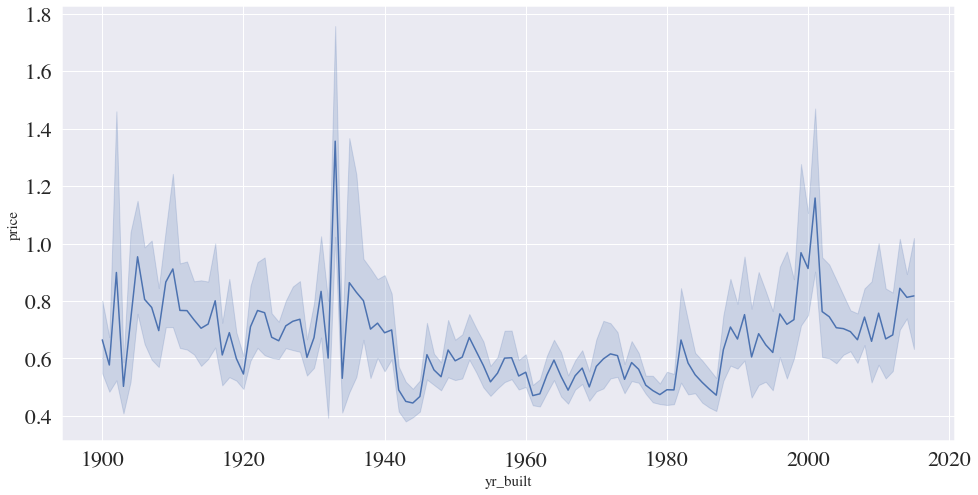

In [92]:
sns.set_style('whitegrid')
sns.set_color_codes("pastel")
sns.set(font_scale=2)
isns.set_context(fontfamily="times")

fig, ax = plt.subplots(1,1, figsize=(16,8))

sns.lineplot(data=kc_data, x="yr_built", y="price")

In [93]:
kc_data.yr_renovated.unique()

array([1991,    0, 2002, 1992, 1994, 1978, 2005, 2003, 1984, 2011, 2014,
       2013, 1988, 1995, 1977, 1998, 1970, 1989, 1990, 2004, 1986, 2007,
       1987, 2006, 2000, 1979, 1997, 1983, 2015, 2012, 2008, 1962, 1999,
       2001, 1985, 1980, 1993, 1955, 1996, 2010, 2009, 1969, 1940, 1975,
       1957, 1956, 1973, 1968, 1982, 1934, 1965, 1964])

In [94]:
kc_data['yr_renovated'].value_counts()

0       7052
2014      41
2013      17
2000      14
2008      13
2003      12
2005      12
2006      12
2004      11
2007      10
1990       9
1996       9
2010       9
2015       8
1987       8
1999       8
1991       8
1998       7
1984       7
2001       7
1970       6
2009       6
2002       6
1993       6
1986       6
2011       5
1992       5
1983       5
1989       4
1985       4
1995       4
1988       4
1994       3
1975       3
1982       3
1977       3
1980       3
1979       2
1969       2
1965       2
2012       2
1997       2
1964       1
1955       1
1956       1
1978       1
1962       1
1968       1
1940       1
1973       1
1957       1
1934       1
Name: yr_renovated, dtype: int64

In [95]:
year_price = kc_data[['yr_renovated','price']]
year_price

,yr_renovated,price
1,1991,0.5380
3,0,0.6040
5,0,1.2300
8,0,0.2295
11,0,0.4680
...,...,...
21572,0,0.4145
21574,0,1.2200
21579,0,0.5200
21590,0,1.0100


In [96]:
reno_years  = year_price.replace(0, pd.np.nan).dropna(axis=0, 
                                                      how='any').fillna(0).astype(int)

In [97]:
group_yr_reno= reno_years.groupby(['yr_renovated']).mean()
group_yr_reno = pd.DataFrame.reset_index(group_yr_reno)

In [98]:
group_yr_reno.head()

,yr_renovated,price
0,1934,0.0
1,1940,0.0
2,1955,0.0
3,1956,0.0
4,1957,0.0


<AxesSubplot:xlabel='yr_renovated', ylabel='price'>

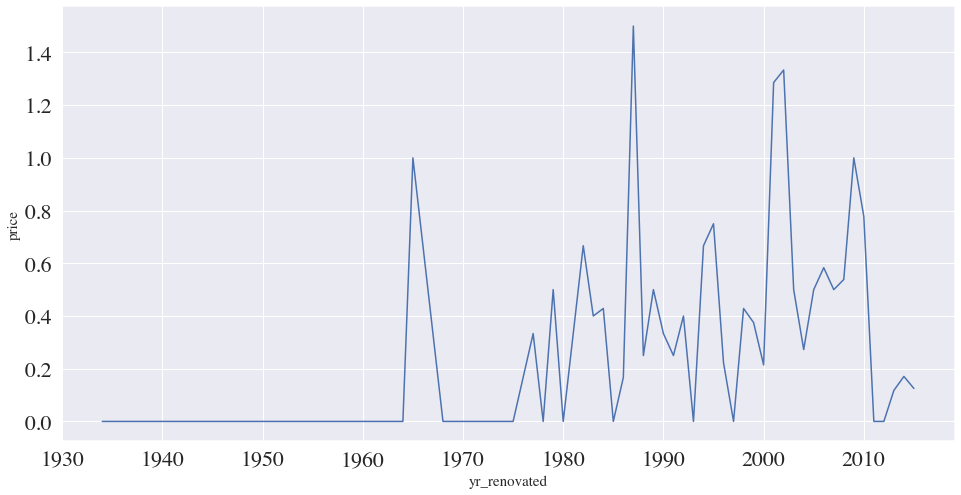

In [99]:
sns.set_style('whitegrid')
sns.set_color_codes("pastel")
sns.set(font_scale=2)
isns.set_context(fontfamily="times")

fig, ax = plt.subplots(1,1, figsize=(16,8))

sns.lineplot(data=group_yr_reno, x="yr_renovated", y="price")

In [100]:
# Let's check yr_built stats and asses the virable. 
top20p.yr_built.describe()

count    1474.000000
mean     1965.005427
std        33.081355
min      1900.000000
25%      1937.000000
50%      1967.000000
75%      1996.000000
max      2015.000000
Name: yr_built, dtype: float64

In [101]:
# Here are the  bins  based on the values observed above. 
#5 values will result in 4 bins

bins = [0, 1952, 1975, 1990, 1997, 2015]

#We'll pd.cut method to separate data into bins.
bins_yr_built = pd.cut(top20p['yr_built'], bins)

#We'll use .cat.as_unordered() method transforming the data to ordered categories.
bins_yr_built = bins_yr_built.cat.as_unordered()
#bins_yr_built.head()

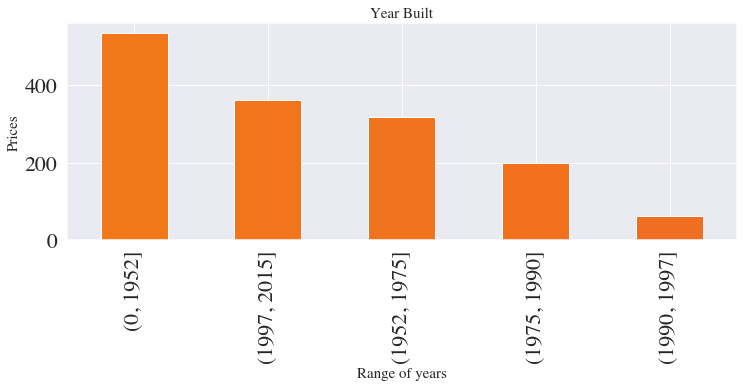

In [102]:
#Let's visualize the bins
fig, ax = plt.subplots(figsize=(15,6))
from matplotlib import cm

color = cm.inferno_r(np.linspace(.3, .5, 40))
isns.set_context(fontfamily="times")
bins_yr_built.value_counts().plot(kind='bar',stacked=True, color=color, legend=False, figsize=(12, 4))
plt.xlabel('Range of years')
plt.ylabel('Prices')
plt.title('Year Built')
#plt.legend()
plt.show()

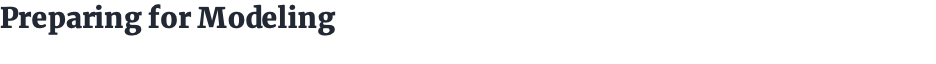

In order to prepare for the model prediction, I will be dealing with the following elements:

    * Ensure that there is no multicollinearity that none of the independent variables are correlated.
    * Handle categorical valuables by eitheruse dummy encoding or use one-hot-encoding.
    * Scaling and normalizing the data.


In [103]:
# We will extract all the variables beside the target variable. 
kc_pred = kc_data.iloc[:,3:55]
kc_pred.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,dateyear,date_month,year,month
1,3.0,2.25,2570,7242,2.0,0,1,3,7,2170,...,1991,98125,47.7210,-122.319,1690,7639,2014,12,2014,12
3,4.0,3.00,1960,5000,1.0,0,1,5,7,1050,...,0,98136,47.5208,-122.393,1360,5000,2014,12,2014,12
5,4.0,4.50,5420,101930,1.0,0,1,3,11,3890,...,0,98053,47.6561,-122.005,4760,101930,2014,5,2014,5
8,3.0,1.00,1780,7470,1.0,0,1,3,7,1050,...,0,98146,47.5123,-122.337,1780,8113,2015,4,2015,4
11,2.0,1.00,1160,6000,1.0,0,1,4,7,860,...,0,98115,47.6900,-122.292,1330,6000,2014,5,2014,5


In [104]:
kc_pred.isnull().sum()

bedrooms         1
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dateyear         0
date_month       0
year             0
month            0
dtype: int64

In [105]:
kc_pred.dropna(subset=['bedrooms'], inplace=True)

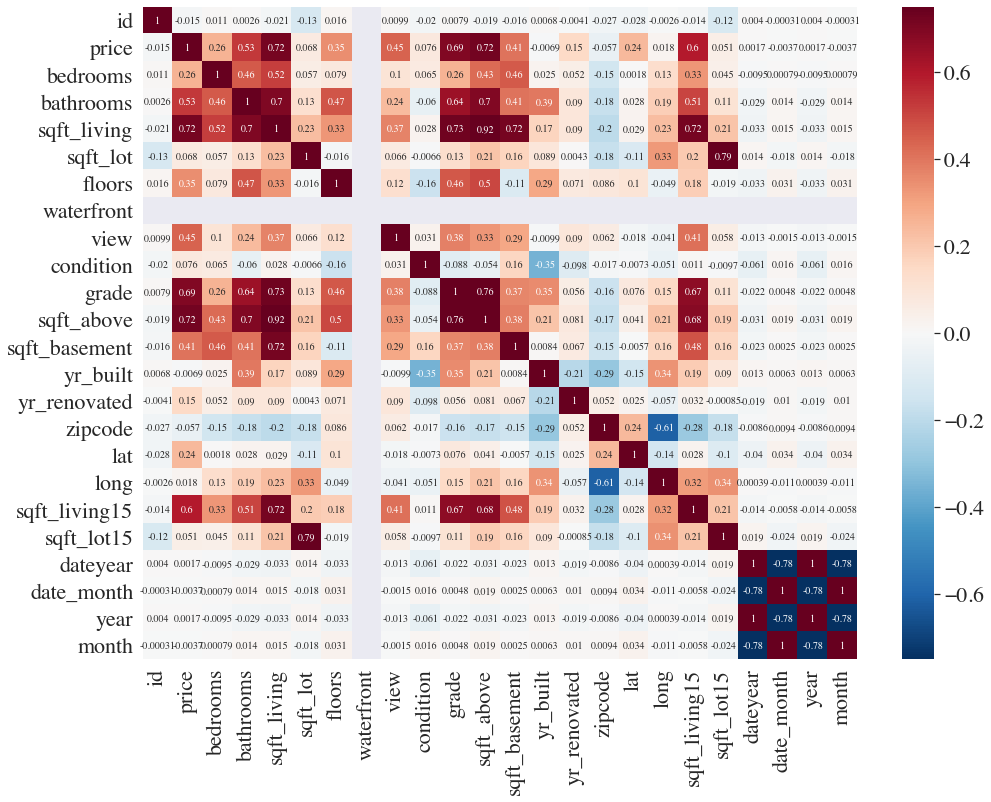

In [106]:
# Checking for correlation among the variables using a heat map.

corr  = kc_data.corr()
plt.figure(figsize=(16, 12))
sns.set(font_scale=2)
isns.set_context(fontfamily="times")
heatmap = sns.heatmap(corr, annot=True, linewidths=0, vmin=-0.75, 
                      vmax=0.75, cmap="RdBu_r")

#### Creating a function that generates a list of two variables and the respective correlation to check for multicoliniartiy. I will not include a correlation higher than 0.6. 


In [107]:
mc_variables = []  # Creating an empty list for variables
mc_corr = [] # Creating an empty list for corr number

def check_mc(feature):
    for idx, correlation in corr[feature].T.iteritems():  
        # Loop through the variables
        if correlation >= .60 and idx != feature:
            mc_variables.append([feature, idx]) 
            # Add to the list 
            mc_corr.append(correlation)
            
                                                                                    
# Establishing a dataframe to show the results.

for feature in corr:
    check_mc(feature)
mc_df = pd.DataFrame({'Correlations':mc_corr, 
                      'Features': mc_variables}).sort_values(by=['Correlations'], ascending=False) 


In [108]:
print('Multicollinear Features')
display(mc_df)

Multicollinear Features


,Correlations,Features
31,1.000000,"[month, date_month]"
30,1.000000,"[year, dateyear]"
29,1.000000,"[date_month, month]"
28,1.000000,"[dateyear, year]"
9,0.920198,"[sqft_living, sqft_above]"
20,0.920198,"[sqft_above, sqft_living]"
27,0.794075,"[sqft_lot15, sqft_lot]"
12,0.794075,"[sqft_lot, sqft_lot15]"
21,0.759163,"[sqft_above, grade]"
16,0.759163,"[grade, sqft_above]"


#### Implementing  VIF Score function using statsmodels.
 
VIF starts at 1 and has no upper limit
VIF = 1, no correlation between the independent variable and the other variables
VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others.


In [109]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif_scores(kc_pred):
    
    VIF_Scores = pd.DataFrame()
    VIF_Scores["Independent Features"] = kc_pred.columns
    VIF_Scores["VIF Scores"] = [variance_inflation_factor(kc_pred.values,i)
                                for i in range(kc_pred.shape[1])]
    return VIF_Scores

vif_scores(kc_pred)

,Independent Features,VIF Scores
0,bedrooms,2.329040e+01
1,bathrooms,2.673418e+01
2,sqft_living,inf
3,sqft_lot,3.300548e+00
4,floors,1.708991e+01
5,waterfront,NaN
6,view,4.100013e+00
7,condition,3.312603e+01
8,grade,1.661402e+02
9,sqft_above,inf


In [110]:
kc_data = kc_data[['price','sqft_living','waterfront','condition','grade',
                   'view','month','sqft_lot']]

#### Here are all the categorical features which we will convert to dummy variables by using get_dummies method.

* view
* condition
* grade
* yr_built 



In [111]:
WF_dummies = pd.get_dummies(kc_data["waterfront"], prefix="WV")
View_dummies = pd.get_dummies(kc_data["view"], prefix="View")
Con_dummies = pd.get_dummies(kc_data["condition"], prefix="Con")
Grade_dummies = pd.get_dummies(kc_data["grade"], prefix="Grade")
Month_dummies = pd.get_dummies(kc_data["month"], prefix="Month")

In [112]:
kc_data.drop(['waterfront','view','condition','grade','month'], 
             axis =1, inplace=True)

In [113]:
# Add the new dummy variables to the data frame
kc_data = pd.concat([kc_data, WF_dummies , View_dummies, Con_dummies,
                     Grade_dummies, Month_dummies], axis=1)

kc_data.head()

,price,sqft_living,sqft_lot,WV_0,View_1,View_2,View_3,View_4,View_5,Con_1,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
1,0.5380,2570,7242,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.6040,1960,5000,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,1.2300,5420,101930,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8,0.2295,1780,7470,1,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
11,0.4680,1160,6000,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [114]:
kc_data.head()

,price,sqft_living,sqft_lot,WV_0,View_1,View_2,View_3,View_4,View_5,Con_1,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
1,0.5380,2570,7242,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.6040,1960,5000,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,1.2300,5420,101930,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8,0.2295,1780,7470,1,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
11,0.4680,1160,6000,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [115]:
kc_data.isnull().sum()


price          0
sqft_living    0
sqft_lot       0
WV_0           0
View_1         0
View_2         0
View_3         0
View_4         0
View_5         0
Con_1          0
Con_2          0
Con_3          0
Con_4          0
Con_5          0
Grade_4        0
Grade_5        0
Grade_6        0
Grade_7        0
Grade_8        0
Grade_9        0
Grade_10       0
Grade_11       0
Grade_12       0
Grade_13       0
Month_1        0
Month_2        0
Month_3        0
Month_4        0
Month_5        0
Month_6        0
Month_7        0
Month_8        0
Month_9        0
Month_10       0
Month_11       0
Month_12       0
dtype: int64

#### Last few steps before applying linear regression model: 
 
    Splitting the data into 75% training and 25% testing.
 
    Checking that the split occurred correctly. 
 
    Normalizing distribution by using log function. 
 
    Checking log transformation.

In [116]:
# Split features X and target y
X = kc_data.drop('price', axis = 1)
y = kc_data['price']

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, 
                                                    random_state=42)

In [118]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(5527, 35) (5527,) (1843, 35) (1843,)


In [119]:
kc_train = pd.concat([X_train, y_train], axis = 1)
kc_train.head()

,sqft_living,sqft_lot,WV_0,View_1,View_2,View_3,View_4,View_5,Con_1,Con_2,...,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,price
9542,2230,9640,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0.43500
6285,2400,9537,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0.39000
3895,2100,9984,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0.41880
9092,2670,6780,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0.67500
18304,2880,213444,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0.57995


Applying log transformation for the continuous variables that are not normally distributed. 

In [120]:
kc_train['price'] = np.log(kc_train['price'])
kc_train['sqft_living'] = np.log(kc_train['sqft_living'])
kc_train['sqft_lot'] = np.log(kc_train['sqft_lot'])

In [121]:
check_log = kc_data[['price','sqft_living','sqft_lot']]

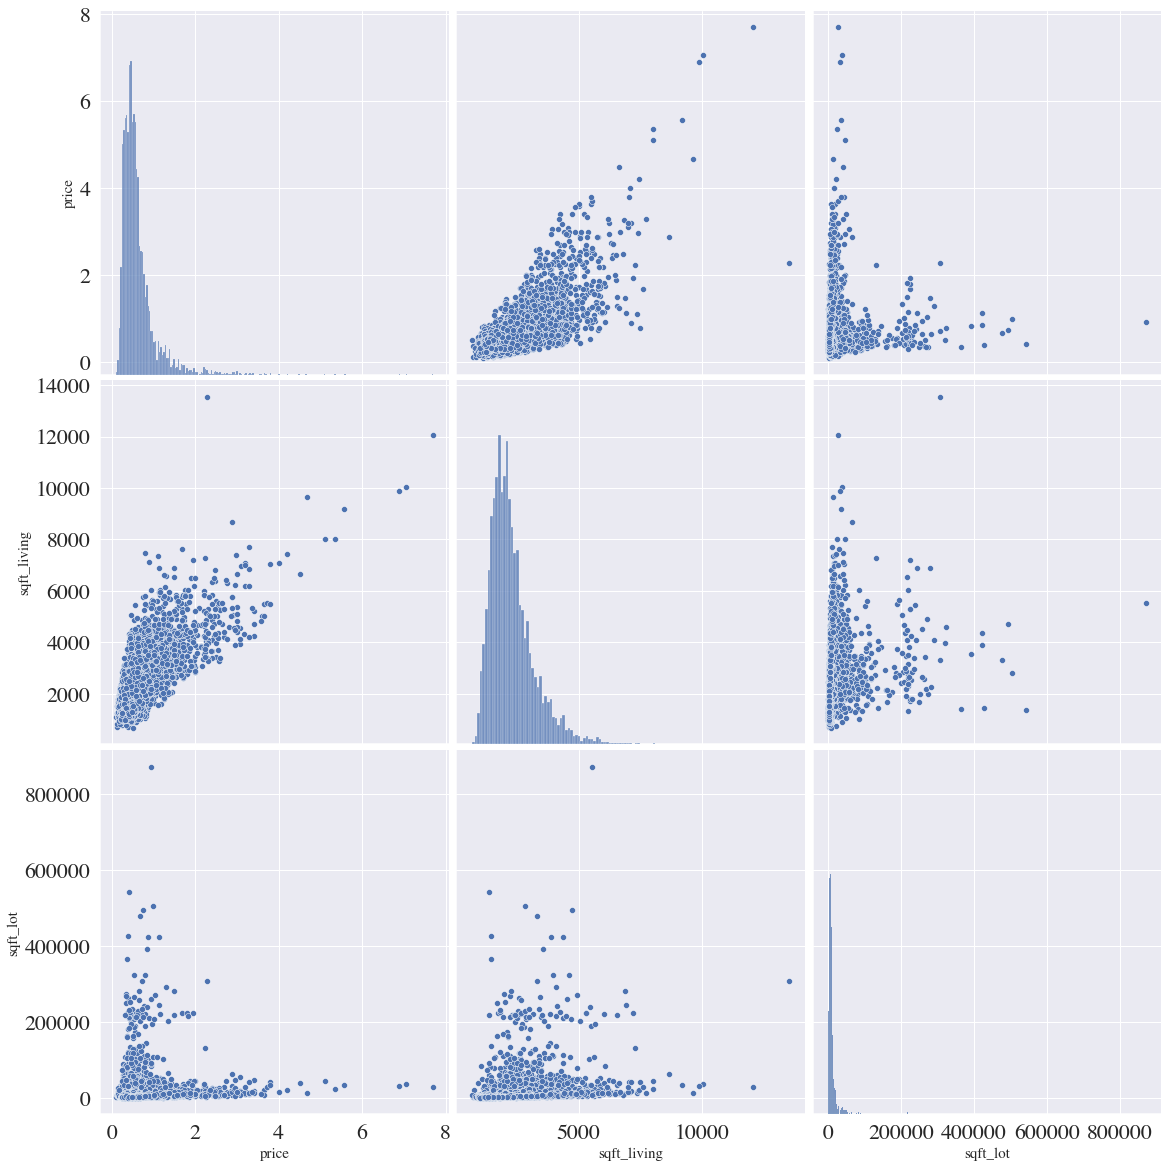

In [122]:
sns.pairplot(check_log, height=5.5, aspect=1)

sns.set(font_scale=2)

Applying StandardScaler into a function in order to standardize the data into the same units.

In [123]:
# Let's create a StandardScaler object to scale our data for us.
ss = StandardScaler()

In [124]:
# Get scaling parameters with the train sample exclusively, 
# using the Scaler.fit() function
ss.fit(kc_train)

StandardScaler()

In [125]:
kc_train_scaled = pd.DataFrame(ss.transform(kc_train))


In [126]:
kc_train_scaled.describe()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
count,5.527000e+03,5.527000e+03,5527.0,5.527000e+03,5.527000e+03,5.527000e+03,5.527000e+03,5.527000e+03,5.527000e+03,5.527000e+03,...,5.527000e+03,5.527000e+03,5.527000e+03,5.527000e+03,5.527000e+03,5.527000e+03,5.527000e+03,5.527000e+03,5.527000e+03,5.527000e+03
mean,5.107162e-16,3.078574e-16,0.0,-4.774642e-16,-4.061645e-17,-2.697217e-16,9.511319e-18,-1.053848e-15,1.101746e-15,-9.582579e-16,...,-2.128446e-16,-4.903100e-16,7.979263e-16,-5.967926e-17,1.179524e-16,-7.824190e-16,-5.450076e-16,-5.579438e-16,-4.723721e-16,2.956845e-17
std,1.000090e+00,1.000090e+00,0.0,1.000090e+00,1.000090e+00,1.000090e+00,1.000090e+00,1.000090e+00,1.000090e+00,1.000090e+00,...,1.000090e+00,1.000090e+00,1.000090e+00,1.000090e+00,1.000090e+00,1.000090e+00,1.000090e+00,1.000090e+00,1.000090e+00,1.000090e+00
min,-3.123039e+00,-2.843785e+00,0.0,-2.239229e+00,-1.743209e-01,-2.717157e-01,-2.036042e-01,-1.704256e-01,-1.902606e-02,-8.429955e-02,...,-3.443827e-01,-3.570700e-01,-3.394317e-01,-3.341034e-01,-3.177987e-01,-2.969955e-01,-3.080407e-01,-2.608051e-01,-2.728657e-01,-3.196678e+00
25%,-6.703544e-01,-4.724627e-01,0.0,4.465823e-01,-1.743209e-01,-2.717157e-01,-2.036042e-01,-1.704256e-01,-1.902606e-02,-8.429955e-02,...,-3.443827e-01,-3.570700e-01,-3.394317e-01,-3.341034e-01,-3.177987e-01,-2.969955e-01,-3.080407e-01,-2.608051e-01,-2.728657e-01,-6.751977e-01
50%,-6.523868e-02,-6.805300e-03,0.0,4.465823e-01,-1.743209e-01,-2.717157e-01,-2.036042e-01,-1.704256e-01,-1.902606e-02,-8.429955e-02,...,-3.443827e-01,-3.570700e-01,-3.394317e-01,-3.341034e-01,-3.177987e-01,-2.969955e-01,-3.080407e-01,-2.608051e-01,-2.728657e-01,-7.591808e-02
75%,6.162702e-01,3.867076e-01,0.0,4.465823e-01,-1.743209e-01,-2.717157e-01,-2.036042e-01,-1.704256e-01,-1.902606e-02,-8.429955e-02,...,-3.443827e-01,-3.570700e-01,-3.394317e-01,-3.341034e-01,-3.177987e-01,-2.969955e-01,-3.080407e-01,-2.608051e-01,-2.728657e-01,5.578229e-01
max,4.988731e+00,5.339827e+00,0.0,4.465823e-01,5.736547e+00,3.680317e+00,4.911489e+00,5.867665e+00,5.255949e+01,1.186246e+01,...,2.903746e+00,2.800571e+00,2.946101e+00,2.993085e+00,3.146646e+00,3.367054e+00,3.246324e+00,3.834280e+00,3.664807e+00,4.957531e+00


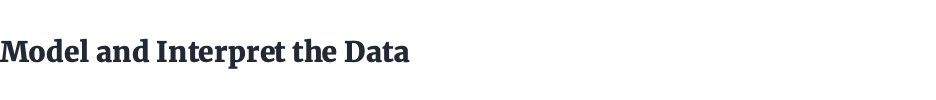

Using statsmodels stepwise selection in order to select features based on its p-values.

In [127]:
import statsmodels.api as sm

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

 

      

In [128]:
#predictors = kc_train_scaled.drop('price', axis=1)

In [129]:
X_train.shape

(5527, 35)

The function has chosen the following features. 

In [130]:
result = stepwise_selection(X_train, y_train, verbose = True)
print('resulting features:')
print(result)

Add  sqft_living                    with p-value 0.0
Add  View_5                         with p-value 1.09148e-106
Add  Grade_11                       with p-value 4.21949e-37
Add  Grade_12                       with p-value 8.98278e-40
Add  Grade_10                       with p-value 1.46685e-50
Add  Grade_13                       with p-value 2.29835e-46
Add  Grade_9                        with p-value 1.17225e-60
Add  WV_0                           with p-value 4.50713e-29
Add  sqft_lot                       with p-value 4.5142e-27
Add  Con_5                          with p-value 1.74473e-23
Add  Grade_8                        with p-value 8.8622e-21
Add  View_1                         with p-value 4.21565e-16
Add  Con_4                          with p-value 3.12956e-07
Add  View_3                         with p-value 0.00089122
Add  Month_4                        with p-value 0.00327365
Add  Month_3                        with p-value 0.00175463
resulting features:
['sqft_living', 

In [131]:
best_features = ['WV_0', 'sqft_living', 'Grade_7', 'View_1', 'Grade_6', 
                 'Grade_8', 'Con_5', 'View_5', 'Grade_5', 'Grade_9', 'Con_4',
                 'sqft_lot', 'Grade_10', 'Month_3','Month_4', 'Con_2','View_3']

#### Running the OLS regression model.  

In [132]:
X_train_fin = X_train[best_features] # Using the best features for the model
X_train_int = sm.add_constant(X_train_fin) #Fitting the training data
model = sm.OLS(y_train, X_train_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     612.1
Date:                Tue, 20 Sep 2022   Prob (F-statistic):               0.00
Time:                        21:41:59   Log-Likelihood:                -441.76
No. Observations:                5527   AIC:                             917.5
Df Residuals:                    5510   BIC:                             1030.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
WV_0            1.0659      0.038     28.157      0.000       0.992       1.140
sqft_living     0.0002   5.72e-06     30.353      0.000       0.000       0.000
Grade_7        -0.8674      0.029    -30.129      0.000      -0.924      -0.811
View_1         -0.1120      0.015     -7.703      0.000      -0.141      -0.084
Grade_6        -0.8893      0.033    -26.632      0.000      -0.955      -0.824
Grade_8        -0.8010      0.027    -29.151      0.000      -0.855      -0.747
Con_5           0.1311      0.012     10.993      0.000       0.108       0.155
View_5          0.3857      0.025     15.349      0.000       0.336       0.435
Grade_5        -0.9180      0.082    -11.240      0.000      -1.078      -0.758
Grade_9        -0.6324      0.027    -23.644      0.000      -0.685      -0.580
Con_4           0.0366      0.008      4.571      0.000       0.021       0.052
sqft_lot    -1.176e-06   1.16e-07    -10.153      0.000    -1.4e-06   -9.49e-07
Grade_10       -0.4419      0.028    -16.023      0.000      -0.496      -0.388
Month_3         0.0383      0.013      3.036      0.002       0.014       0.063
Month_4         0.0345      0.012      2.980      0.003       0.012       0.057
Con_2          -0.0120      0.042     -0.283      0.777      -0.095       0.071
View_3         -0.0598      0.019     -3.142      0.002      -0.097      -0.023
==============================================================================
Omnibus:                     3557.926   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           205410.265
Skew:                           2.386   Prob(JB):                         0.00
Kurtosis:                      32.482   Cond. No.                     8.64e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.64e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Evaluating and Interpreting the Regression Model

In [133]:
X_train_final = X_train[best_features]
X_test_final = X_test[best_features]

#### R Squared

In [134]:
final_model = LinearRegression()

# Fit the model on X_train_final and y_train
final_model.fit(X_train_final, y_train)

# Score the model on test data applying built-in .score method)
final_model.score(X_test_final, y_test)

0.6470202388867357

#### The R-Squared for the testing data is 0.65 which is very close to 0.64 that we got in the training data.  

#### Mean Squared Error

In [135]:
mean_squared_error(y_test, final_model.predict(X_test_final), 
                   squared=False)

0.2887858740795608

In [136]:
print(pd.Series(final_model.coef_, index=X_train_final.columns, 
                name="Coefficients"))
print("Model's Intercept:", final_model.intercept_)

WV_0           0.000000
sqft_living    0.000174
Grade_7       -0.867442
View_1        -0.112014
Grade_6       -0.889255
Grade_8       -0.800978
Con_5          0.131145
View_5         0.385743
Grade_5       -0.918013
Grade_9       -0.632385
Con_4          0.036637
sqft_lot      -0.000001
Grade_10      -0.441933
Month_3        0.038302
Month_4        0.034455
Con_2         -0.011996
View_3        -0.059841
Name: Coefficients, dtype: float64
Model's Intercept: 1.0658936676178987


#### The model’s intercept which is the base price for a house is roughly $1.06 Million. The prices varies depending on the increase or decrease of each variable.  

In [137]:
linreg = LinearRegression()

linreg.fit(X_train_final, y_train)
y_hat_test = linreg.predict(X_test_final)

In [138]:
y_hat_train = linreg.predict(X_train_final)

In [139]:
train_error = y_train-y_hat_train

In [140]:
# We will use sklearn.metrics to calculate the test 
# data Mean Square Error 

from sklearn.metrics import mean_squared_error
test_residuals = y_hat_test - y_test
train_residuals = y_hat_train - y_train
test_mse = mean_squared_error(y_test, y_hat_test)


In [141]:
# create and print mean squared error variable

print('\nTraining Mean Squared Error is',
      mean_squared_error(y_train,y_hat_train))
print('Testing Mean Squared Error is', 
      mean_squared_error(y_test,y_hat_test))

# Creating and printing root mean squared error

print('\nTraining Root Mean Squared Error is', 
      np.sqrt(mean_squared_error(y_train,y_hat_train)))
print('Testing Root Mean Squared Error is', 
      np.sqrt(mean_squared_error(y_test,y_hat_test)))
  
# create and view training and testing r squared

print('\nTraining R squared is',
      r2_score(y_train,y_hat_train))
print('Testing R squared is',
      r2_score(y_test,y_hat_test))




Training Mean Squared Error is 0.06869881197184738
Testing Mean Squared Error is 0.08339728106789594

Training Root Mean Squared Error is 0.26210458212676746
Testing Root Mean Squared Error is 0.2887858740795608

Training R squared is 0.6399582088928608
Testing R squared is 0.6470202388867357


#### Mean Squared Error - the average(squared) discrepancy of house prices in this model will be roughly $68K per house. 

#### Root Mean Squared Error - the average deviation between the predicted house  and the actual house price is roughly $262K.

#### R squared - 64% of the variability observed in the house prices is explained by the independent variables 9 (i.e sqft_living, view, grade, waterfront...etc.) in a regression model. 

#### All of the above training and testing evaluation resutls are very close to one another which suggests that our model is not overfitted or underfitted. 

####  Testing if the linear assumption is violated. The graph shows that the relationship between actual prices and predictable prices is linear.






<Figure size 1584x1296 with 0 Axes>

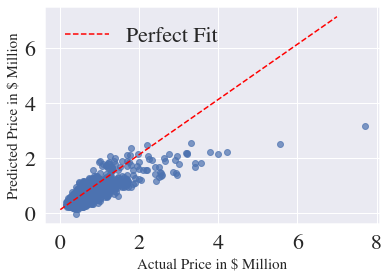

In [142]:
sns.set(font_scale=2)
isns.set_context(fontfamily="times")
plt.figure(figsize=(22, 18))


preds = final_model.predict(X_test_final)
fig, ax = plt.subplots()

linear_line = np.arange(y_test.min(), y_test.max())
ax.plot(linear_line, linestyle="--", color="red", label="Perfect Fit")
ax.scatter(y_test, preds, alpha=0.7)
ax.set_xlabel("Actual Price in $ Million")
ax.set_ylabel("Predicted Price in $ Million")
ax.legend();

#### Plotting a histogram of the residuals. Ensuring that the residuals are distributed normally. 

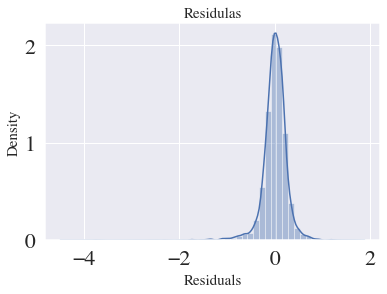

In [143]:
sns.distplot(train_residuals)
plt.title('Residulas' )
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()

### Conclusions:

I have determined that the most valuable assets of a house in King County are zip code, view, grade and condition, square footage, and seasonality. Below are investment recommendations for Edegon and Company:

**LOCATION:** Invest in the zip codes where the value of the house is higher than average in order to increase the chances of maintaining the house value. Consider investing in zip codes 98118, 98116, 98109, 98122, whose market value is currently mid-range but also include some of the most profitable housing features.  

**VIEW:** Prioritize a house with a great view, particularly if it has a waterfront.

**SEASONALITY:**  Sell during the spring season when prices are at their peak, and buy in the months of January and February 

**GRADE AND CONDITION:** very important, more than house age. Keeping high end finishes and choosing high quality materials will lead to a profitable outcome. 

**SIZE:** Look for large living area rather than a lot size! Houses ranging from 2,500 sqft to 5,000 sqft have a high correlation to house prices. 
